In [1]:
import sys
import anndata
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns 
import scipy
import matplotlib.pyplot as plt
sys.path.insert(-1, '../..')
import _utils

In [2]:
full_fn = anndata.read('../thymus_annotation/annotation/query_and_reference_final.h5ad')

In [3]:
full_fn.obs['_dataset']

4861STDY7462263-GGTGAAGCACGGCTAC                           query
4861STDY7462261-CCTAGCTGTCCAACTA                           query
4861STDY7462261-CCTAGCTGTAGCTGCC                           query
4861STDY7462261-CCTAGCTCATGTAGTC                           query
4861STDY7462261-CCTAGCTCAGCTGTGC                           query
                                                           ...  
TSP2_Thymus_NA_SS2_B113470_B134459_Endothelial_O7_S283       ref
TSP2_Thymus_NA_SS2_B113470_B134459_Endothelial_O8_S284       ref
TSP2_Thymus_NA_SS2_B113470_B134459_Endothelial_P10_S10       ref
TSP2_Thymus_NA_SS2_B113470_B134459_Endothelial_P13_S13       ref
TSP2_Thymus_NA_SS2_B113470_B134459_Endothelial_J17_S173      ref
Name: _dataset, Length: 289562, dtype: category
Categories (2, object): ['ref', 'query']

In [4]:
ref = full_fn[full_fn.obs['_dataset']=='ref'].copy()
query = full_fn[full_fn.obs['_dataset']=='query'].copy()
query

AnnData object with n_obs × n_vars = 255901 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', 'cell_ontology_class_original', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'Sample', 'paper_annotation', 'development_stage', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilities', 'p

In [5]:
query.obsm['umap'] = query.obsm['X_scanvi_umap_popv']
ref.obsm['umap'] = ref.obsm['X_scanvi_umap_popv']

In [6]:
ref

AnnData object with n_obs × n_vars = 33661 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', 'cell_ontology_class_original', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'Sample', 'paper_annotation', 'development_stage', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilities', 'po

In [7]:
query

AnnData object with n_obs × n_vars = 255901 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', 'cell_ontology_class_original', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'Sample', 'paper_annotation', 'development_stage', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilities', 'p

In [8]:
full = full_fn

In [9]:
full

AnnData object with n_obs × n_vars = 289562 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', 'cell_ontology_class_original', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'Sample', 'paper_annotation', 'development_stage', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilities', 'p

# UMAPs

In [13]:
query

AnnData object with n_obs × n_vars = 255901 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', 'cell_ontology_class_original', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'Sample', 'paper_annotation', 'development_stage', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilities', 'p

In [14]:
# making the palette 

from scanpy.plotting import palettes

# making celltypes to colors
query_ct = np.unique(query.obs['popv_prediction']).tolist()
query_gt_ct = np.unique(query.obs['cell_ontology_class']).tolist()

ref_ct = np.unique(ref.obs['cell_ontology_class']).tolist()

all_ct = list(set(ref_ct + query_ct + query_gt_ct))
all_ct.sort()
cmap = palettes.default_102

palette = {}
for i, ct in enumerate(all_ct):
    palette[ct] = cmap[i+1] # added the +1 here because i didnt like how it looked starting with number 1


In [15]:
ref.n_obs

33661

In [16]:
# current point size = 120000/n_cells
print(f'current point size {120000/ref.n_obs}')

current point size 3.564956477823


In [17]:
POINT_SIZE = 3

In [18]:
%%capture 
fig = sc.pl.umap(ref,
                 color="cell_ontology_class",
                 frameon=False,
                 title='TS Reference Annotation', 
                 return_fig = True, 
                 size = POINT_SIZE,
                 palette=palette)

In [19]:
#make legend
from matplotlib.lines import Line2D

legend_elements = []
for ct, color in palette.items():
    legend_elements.append(Line2D([], [], color=color, lw =6, label=ct))
    
fig.get_axes()[0].legend(handles=legend_elements,  loc='upper left', bbox_to_anchor=(1, 1), ncol=5)

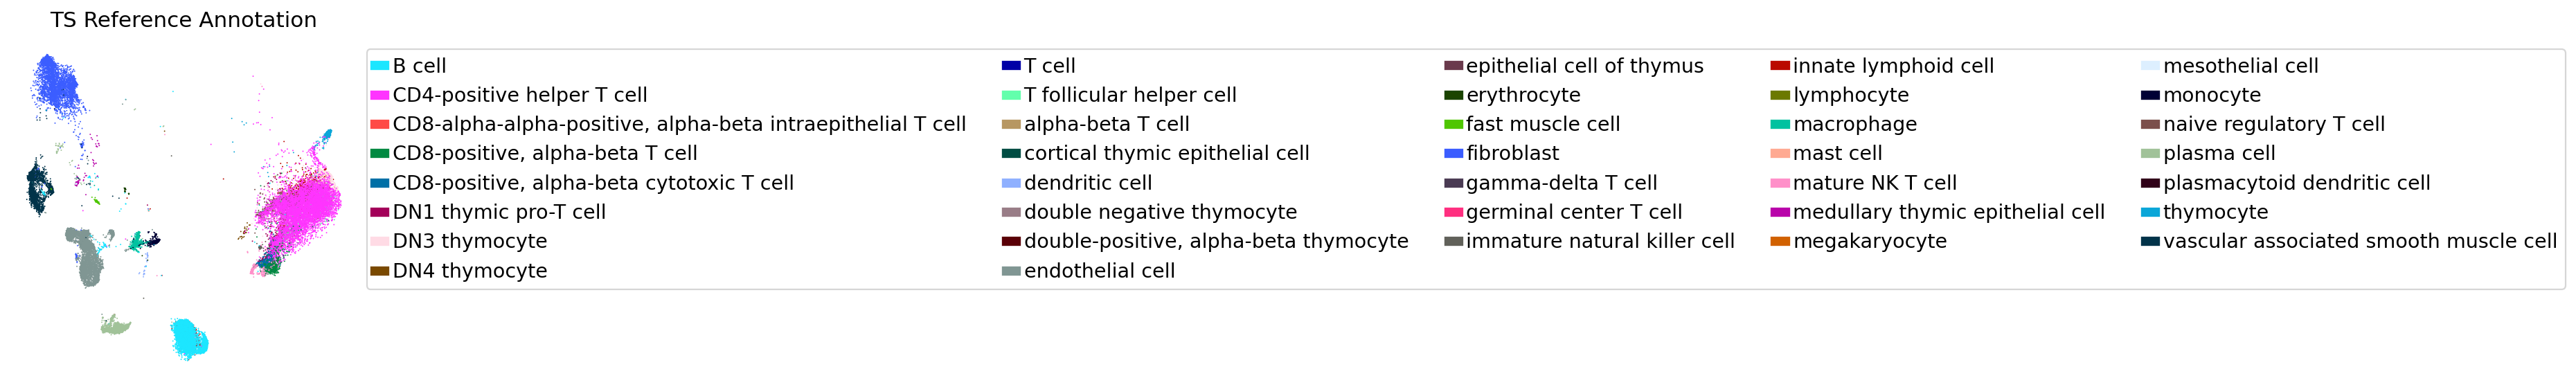

In [20]:
fig

In [21]:
query

AnnData object with n_obs × n_vars = 255901 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', 'cell_ontology_class_original', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'Sample', 'paper_annotation', 'development_stage', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilities', 'p

In [22]:
fig.savefig('fig4/fig4_TS_ref_annotation_with_legend.pdf', bbox_inches='tight')

In [23]:
fig.get_axes()[0].get_legend().remove()

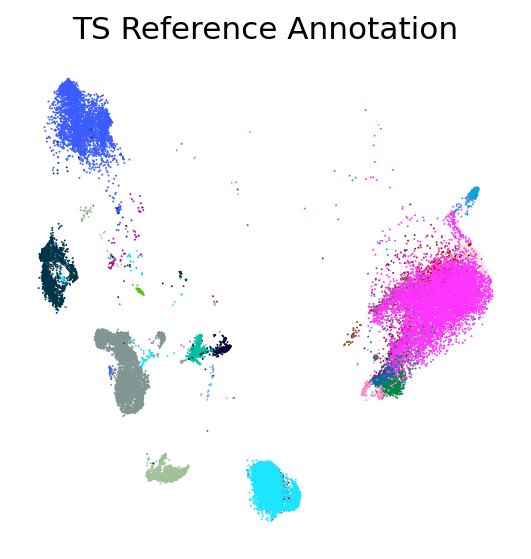

In [24]:
fig

In [25]:
fig.savefig('fig4/fig4_TS_ref_annotation.pdf', bbox_inches='tight')

In [26]:
%%capture
fig = sc.pl.umap(query, 
                 color="popv_prediction", 
                 frameon=False,
                 title='Thymus Predicted Annotation',
                 palette=palette,
                 size=POINT_SIZE,
                 return_fig=True)

In [27]:
fig.get_axes()[0].get_legend().remove()

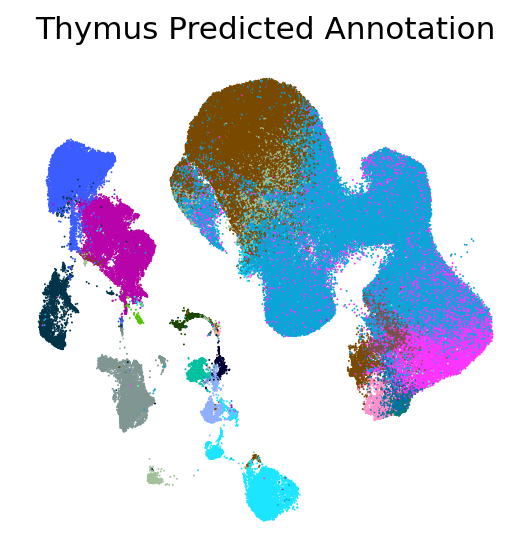

In [28]:
fig

In [29]:
fig.savefig('fig4/fig4_Thymus_popv_annotation.pdf', bbox_inches='tight')

In [30]:
# making colors for the lca ground truth annotations
# if it was used for the previous umaps, and the ct exists there, then use that color, 
# else pick from the end of the cmap list to prevent overlaps

query_gt_ct = np.unique(query.obs['cell_ontology_class']).tolist()
query_gt_palette = {}

for i, ct in enumerate(query_gt_ct):
    tmp_ct = ct
    if tmp_ct in palette:
        query_gt_palette[ct] = palette[tmp_ct]
    else:
        print('missing', ct)
        query_gt_palette[ct] = cmap[-i]


In [31]:
%%capture
fig = sc.pl.umap(query, 
                 color="cell_ontology_class", 
                 frameon=False,
                 title='Thymus Ground Truth Annotation',
                 palette=query_gt_palette,
                 size=POINT_SIZE,
                 return_fig=True)

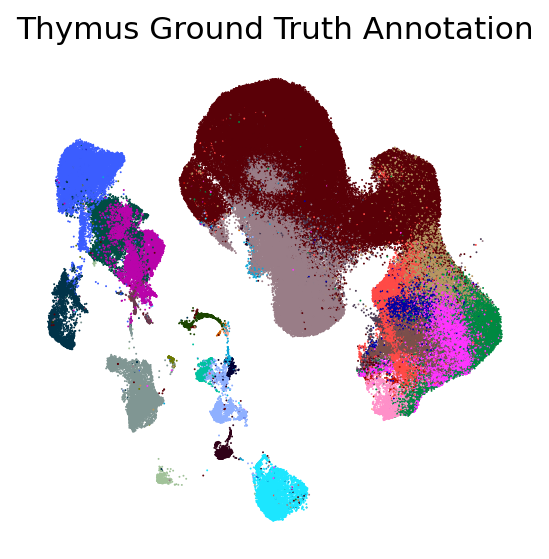

In [32]:
fig.get_axes()[0].get_legend().remove()
fig

In [33]:
fig.savefig('fig4/fig4_LCA_gt_annotation.pdf', bbox_inches='tight')

In [34]:
tmp_full = anndata.AnnData(scipy.sparse.csr_matrix((full.n_obs, full.n_vars)))

tmp_full.obsm['umap'] = full.obsm['X_scanvi_umap_popv']
tmp_full.obs['_dataset'] = full.obs['_dataset'].values
tmp_full.obs['_dataset'] = tmp_full.obs['_dataset'].replace({'query': 'Query Dataset (Thymus)', 'ref': 'Reference Dataset (TS)'})

/tmp/ipykernel_2254216/1370148144.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  tmp_full = anndata.AnnData(scipy.sparse.csr_matrix((full.n_obs, full.n_vars)))


/home/cane/miniconda3/envs/popv_new/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


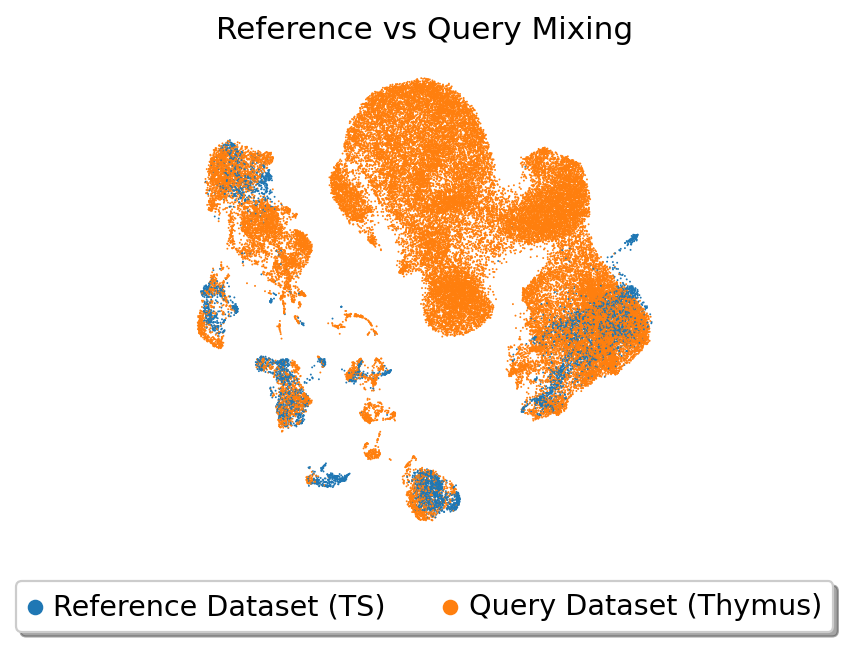

In [35]:
fig = sc.pl.umap(tmp_full[np.random.choice(full.n_obs, 50000, replace=False)], 
                 color= '_dataset',
                 frameon=False,
                 title='Reference vs Query Mixing',
                 size=POINT_SIZE,
                 return_fig=True)

fig.get_axes()[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)



In [36]:
fig.savefig('fig4/fig4_query_ref_mixing.pdf', bbox_inches='tight')

In [38]:
score_palette = {}
cmap = plt.colormaps['tab10']
for score in range(8,0,-1):
    score_palette[score] = cmap(8-score) # added the +1 here because i didnt like how it looked starting with number 1

In [39]:
%%capture
fig = sc.pl.umap(query, color='popv_prediction_score', 
                 title='PopV Agreement Score', 
                 frameon=False,
                 size=POINT_SIZE,
                 return_fig=True,
                 palette=score_palette)

In [41]:
# making legend horizontal
scores = query.obs['popv_prediction_score'].cat.categories.tolist()
colors =  query.uns['popv_prediction_score_colors']

legend_elements = []
for score, color in zip(scores, colors):
    legend_elements.append(Line2D([], [], color=color, lw =6, label=score))
    
fig.get_axes()[0].legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=8)


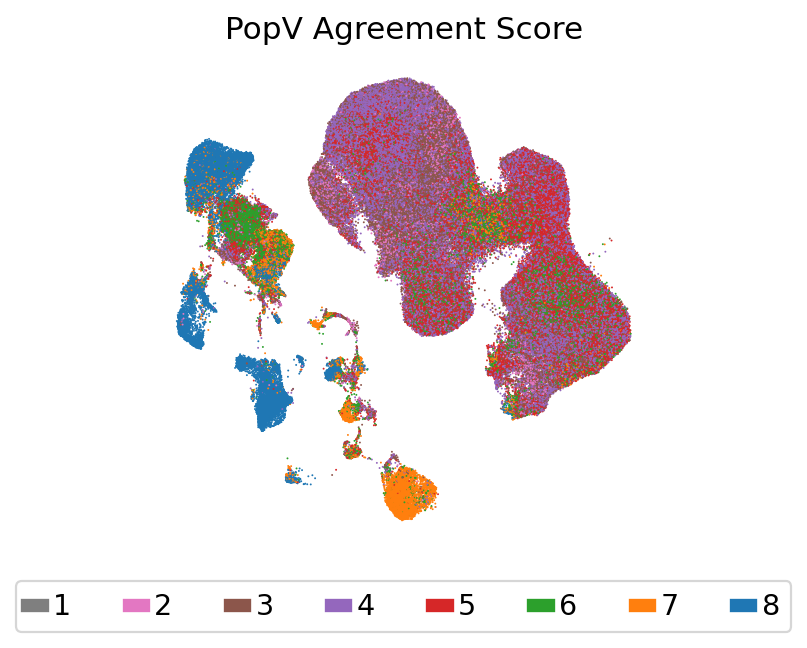

In [42]:
fig

In [43]:
fig.savefig('fig4/fig4_popv_method_agreement.pdf', bbox_inches='tight')

# Accuracy and Seurat

In [10]:
adata = sc.read('../thymus_annotation/annotation/query_and_reference_final.h5ad')

In [11]:
query = adata[adata.obs['_dataset']=='query']

In [12]:
query

View of AnnData object with n_obs × n_vars = 255901 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', 'cell_ontology_class_original', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'Sample', 'paper_annotation', 'development_stage', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilit

In [13]:
df = query.obs[["popv_prediction_score", 'consensus_ontology_accuracy']]

In [14]:
scores = np.unique(df['popv_prediction_score'])

In [15]:
acc_labels = np.unique(df['consensus_ontology_accuracy'])

In [16]:
acc_labels

array(['child', 'exact', 'no match', 'parent', 'sibling'], dtype=object)

In [17]:
parent = 'parent'
child = 'child'
exact = 'exact'
sibling = 'sibling'

In [18]:
exact_acc = []
parent_acc = []
child_acc = []
sibling_acc = []
neighborhood_acc = []
ns = []
for score in scores:
    tmp = df[df['popv_prediction_score']==score]
    n = tmp.shape[0]
    
    ns.append(n)
    
    correct1 = tmp[tmp['consensus_ontology_accuracy'] == exact].shape[0]
    exact_acc.append(correct1/n)
    
    correct2 = tmp[tmp['consensus_ontology_accuracy'] == parent].shape[0]
    parent_acc.append(correct2/n)
    
    correct3 = tmp[tmp['consensus_ontology_accuracy'] == child].shape[0]
    child_acc.append(correct3/n)
    
    correct4 = tmp[tmp['consensus_ontology_accuracy'] == sibling].shape[0]
    sibling_acc.append(correct4/n)
    
    neighborhood_score = (correct1+correct2+correct3+correct4)/n
    neighborhood_acc.append(neighborhood_score)
    print(score, neighborhood_score, n)

1 0.19047619047619047 21
2 0.3277448198779125 11631
3 0.3793788920667762 49299
4 0.4460277412553451 84423
5 0.5296164006399524 53754
6 0.6966135631583529 22974
7 0.9490367775831874 11420
8 0.9889181822244069 22379


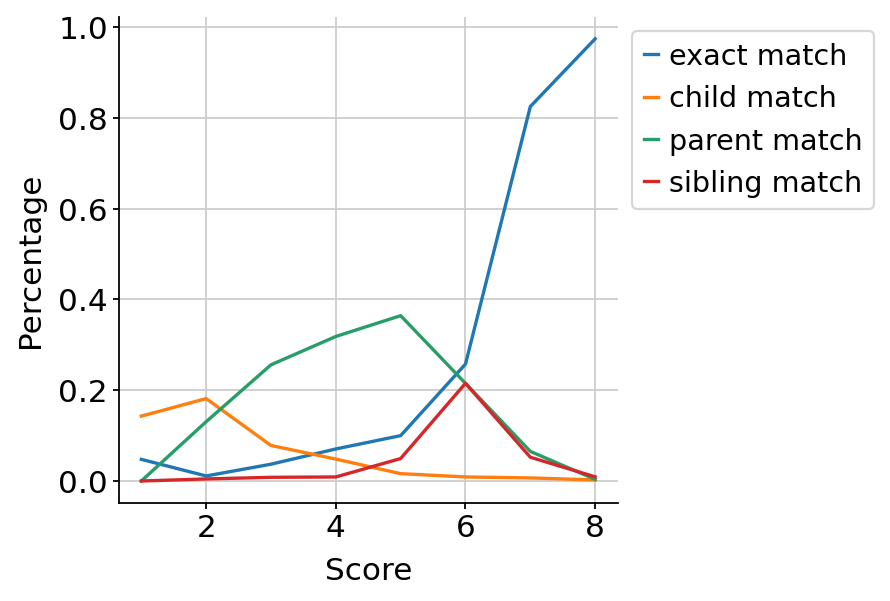

In [19]:
plt.plot(scores, exact_acc, label= 'exact match')
plt.plot(scores, child_acc, label = 'child match')
plt.plot(scores, parent_acc, label = 'parent match')
plt.plot(scores, sibling_acc, label = 'sibling match')
# plt.plot(scores, neighborhood_acc, label = 'neighbor match')

plt.ylabel('Percentage')
plt.xlabel('Score')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.savefig('fig4/fig4_score_percentage.pdf', bbox_inches='tight')
plt.show()


In [20]:
ns

[21, 11631, 49299, 84423, 53754, 22974, 11420, 22379]

In [21]:
labels = [f'{s} (n={n})' for s,n in zip(scores, ns)]

In [22]:
df = pd.DataFrame(index = labels)

In [23]:
df['Exact Match'] = exact_acc
df['Child Match'] = child_acc
df['Parent Match'] = parent_acc
df['Sibling Match'] = sibling_acc

In [24]:
df['No Match'] = 1 - df.sum(axis=1)

In [25]:
df

Exact Match  Child Match  Parent Match  Sibling Match  No Match
1 (n=21)        0.047619     0.142857      0.000000       0.000000  0.809524
2 (n=11631)     0.011091     0.181498      0.130599       0.004557  0.672255
3 (n=49299)     0.036999     0.078298      0.255928       0.008154  0.620621
4 (n=84423)     0.070597     0.048257      0.318290       0.008884  0.553972
5 (n=53754)     0.099881     0.016166      0.364122       0.049447  0.470384
6 (n=22974)     0.257465     0.008923      0.215026       0.215200  0.303386
7 (n=11420)     0.824606     0.006830      0.065236       0.052364  0.050963
8 (n=22379)     0.973815     0.002279      0.003619       0.009205  0.011082

In [26]:
df

Exact Match  Child Match  Parent Match  Sibling Match  No Match
1 (n=21)        0.047619     0.142857      0.000000       0.000000  0.809524
2 (n=11631)     0.011091     0.181498      0.130599       0.004557  0.672255
3 (n=49299)     0.036999     0.078298      0.255928       0.008154  0.620621
4 (n=84423)     0.070597     0.048257      0.318290       0.008884  0.553972
5 (n=53754)     0.099881     0.016166      0.364122       0.049447  0.470384
6 (n=22974)     0.257465     0.008923      0.215026       0.215200  0.303386
7 (n=11420)     0.824606     0.006830      0.065236       0.052364  0.050963
8 (n=22379)     0.973815     0.002279      0.003619       0.009205  0.011082

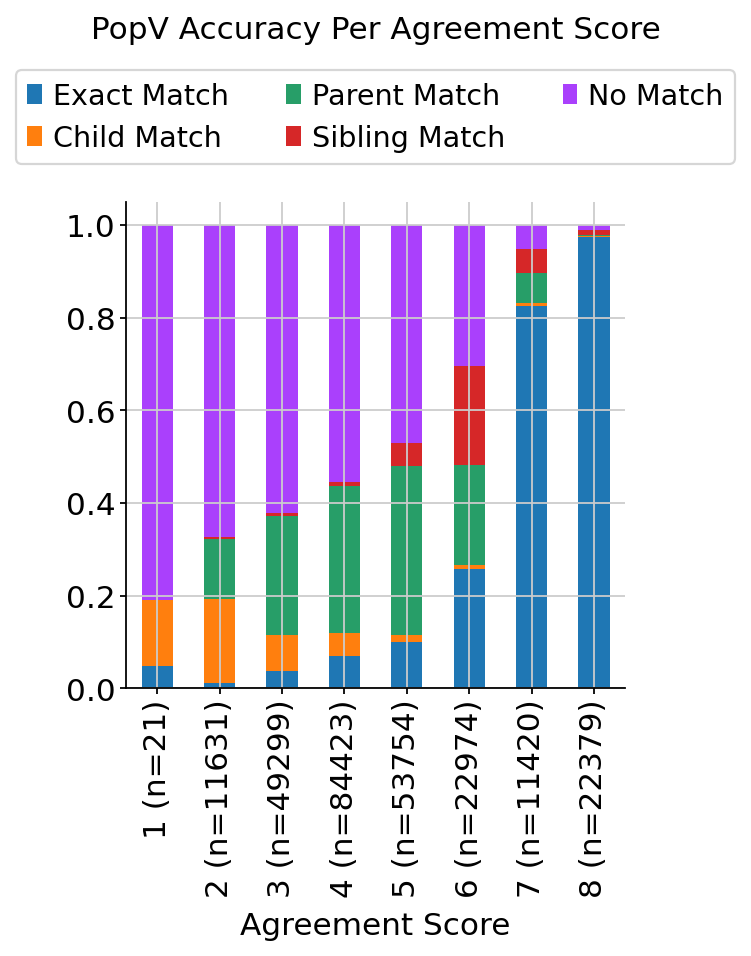

In [27]:
ax = df.plot.bar(stacked=True)

ax.set_xlabel('Agreement Score')
ax.set_title('PopV Accuracy Per Agreement Score', y=1.3)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),ncol=3)
plt.savefig('fig4/fig4_thymus_prediction_accuracy_new.pdf', bbox_inches='tight')

In [28]:
accuracy_replace_dict = {'exact': 'Exact Match', 
                         'parent': 'Parent Match',
                         'child': "Child Match",
                         'sibling': 'Sibling Match',
                         'no match': 'No Match'
                        }

In [29]:
import itertools

ontology_vote_cols = [s for s in query.obs.keys() if s.endswith('ontology_accuracy')]
print(ontology_vote_cols)

all_accs = [list(query.obs[s].value_counts().index) for s in ontology_vote_cols]
all_accs = list(itertools.chain.from_iterable(all_accs))
all_accs = list(set(all_accs))


['consensus_ontology_accuracy', 'popv_onclass_prediction_ontology_accuracy', 'popv_scanvi_prediction_ontology_accuracy', 'popv_celltypist_prediction_ontology_accuracy', 'popv_svm_prediction_ontology_accuracy', 'popv_knn_on_bbknn_prediction_ontology_accuracy', 'popv_rf_prediction_ontology_accuracy', 'popv_knn_on_scvi_prediction_ontology_accuracy', 'popv_knn_on_scanorama_prediction_ontology_accuracy', 'popv_onclass_seen_ontology_accuracy', 'seurat_prediction_ontology_accuracy']


In [30]:
all_accs

['child', 'parent', 'exact', 'sibling', 'no match']

In [31]:
accuracy_replace_dict

{'exact': 'Exact Match',
 'parent': 'Parent Match',
 'child': 'Child Match',
 'sibling': 'Sibling Match',
 'no match': 'No Match'}

In [32]:
ontology_vote_cols

['consensus_ontology_accuracy',
 'popv_onclass_prediction_ontology_accuracy',
 'popv_scanvi_prediction_ontology_accuracy',
 'popv_celltypist_prediction_ontology_accuracy',
 'popv_svm_prediction_ontology_accuracy',
 'popv_knn_on_bbknn_prediction_ontology_accuracy',
 'popv_rf_prediction_ontology_accuracy',
 'popv_knn_on_scvi_prediction_ontology_accuracy',
 'popv_knn_on_scanorama_prediction_ontology_accuracy',
 'popv_onclass_seen_ontology_accuracy',
 'seurat_prediction_ontology_accuracy']

In [33]:
cat_order = [
    "Exact Match",
    "Parent Match",
    "Child Match",
    "Sibling Match",
    "No Match",
]

for s in ontology_vote_cols:
    print(s)
    query.obs[f'{s}_annotated'] = query.obs[s].replace(accuracy_replace_dict)
    query.obs[f'{s}_annotated'] = query.obs[f'{s}_annotated'].astype('category')
    query.obs[f'{s}_annotated'] = query.obs[f'{s}_annotated'].cat.add_categories(set(cat_order)-set(query.obs[f'{s}_annotated'].cat.categories))
    query.obs[f'{s}_annotated'] = query.obs[f'{s}_annotated'].values.reorder_categories(cat_order)

consensus_ontology_accuracy


/tmp/ipykernel_2053494/3730816500.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  query.obs[f'{s}_annotated'] = query.obs[s].replace(accuracy_replace_dict)


popv_onclass_prediction_ontology_accuracy
popv_scanvi_prediction_ontology_accuracy
popv_celltypist_prediction_ontology_accuracy
popv_svm_prediction_ontology_accuracy
popv_knn_on_bbknn_prediction_ontology_accuracy
popv_rf_prediction_ontology_accuracy
popv_knn_on_scvi_prediction_ontology_accuracy
popv_knn_on_scanorama_prediction_ontology_accuracy
popv_onclass_seen_ontology_accuracy
seurat_prediction_ontology_accuracy


In [34]:
from matplotlib import cm, colors

# Colorblindness adjusted vega_10
# See https://github.com/scverse/scanpy/issues/387
vega_10 = list(map(colors.to_hex, cm.tab10.colors))


In [35]:
vega_10

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [36]:
color_map = ['#1f77b4',
             '#2ca02c',
             '#9467bd',
             '#ff7f0e',
             '#d62728',
             '#8c564b',
             '#e377c2',
             '#7f7f7f',
             '#bcbd22',
             '#17becf']

In [37]:
query.obsm['X_umap'] = query.obsm['X_scanvi_umap_popv']

/home/cane/miniconda3/envs/popv_bench/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


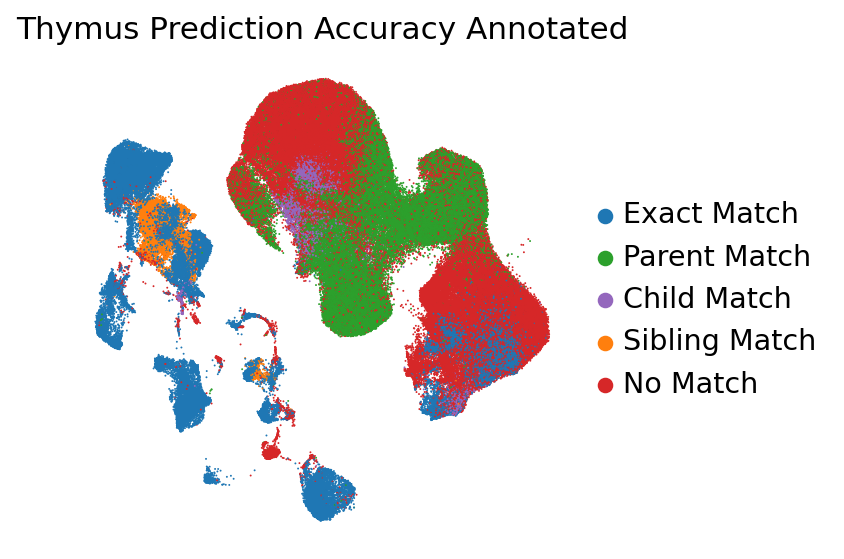

In [38]:
# TODO add an N here

fig = sc.pl.umap(query,
                 color= 'consensus_ontology_accuracy_annotated',
                 title='Thymus Prediction Accuracy Annotated',
                 frameon=False,
                 size=3,
                palette=color_map,
                 return_fig=True)


/home/cane/miniconda3/envs/popv_bench/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


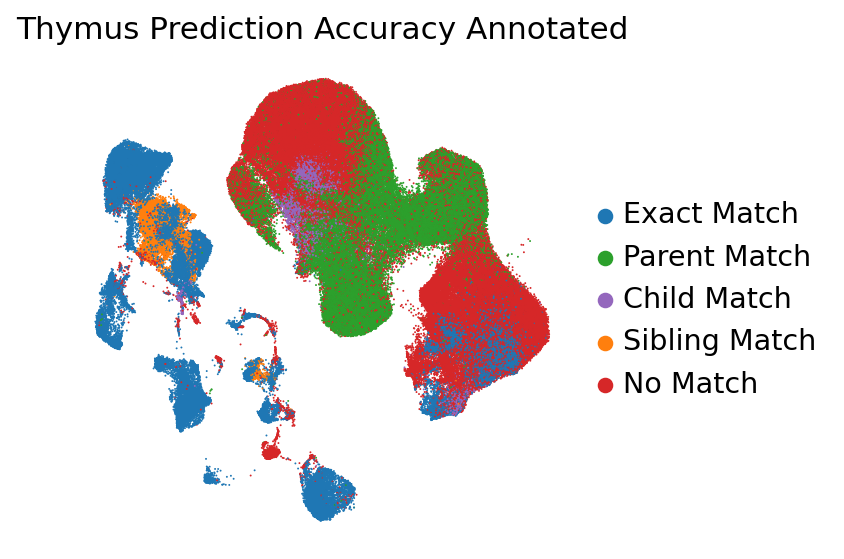

In [39]:
# TODO add an N here

fig = sc.pl.umap(query,
                 color= 'consensus_ontology_accuracy_annotated',
                 title='Thymus Prediction Accuracy Annotated',
                 frameon=False,
                 size=3,
                palette=color_map,
                 return_fig=True)


fig.savefig('fig4/fig4_lca_prediction_accuracy_annotated.pdf', bbox_inches='tight')


In [40]:
query.obs

tissue_in_publication donor_id  \
4861STDY7462263-GGTGAAGCACGGCTAC                   NaN      A16   
4861STDY7462261-CCTAGCTGTCCAACTA                   NaN      A16   
4861STDY7462261-CCTAGCTGTAGCTGCC                   NaN      A16   
4861STDY7462261-CCTAGCTCATGTAGTC                   NaN      A16   
4861STDY7462261-CCTAGCTCAGCTGTGC                   NaN      A16   
...                                                ...      ...   
T07_TH_TOT_1_S1-CAGCTGGAGTTCGCAT                   NaN      T07   
T07_TH_TOT_1_S1-CAGCTGGAGCGATGAC                   NaN      T07   
T07_TH_TOT_1_S1-CAGCTGGAGAGGGCTT                   NaN      T07   
T07_TH_TOT_1_S1-CAGCTAATCTGCAAGT                   NaN      T07   
T07_TH_TOT_1_S1-CAGCTGGTCATAAAGG                   NaN      T07   

                                 free_annotation compartment  \
4861STDY7462263-GGTGAAGCACGGCTAC             NaN         NaN   
4861STDY7462261-CCTAGCTGTCCAACTA             NaN         NaN   
4861STDY7462261-CCTAGCTGTAGCTGCC             NaN         NaN   
4861STDY7462261-CCTAGCTCATGTAGTC             NaN         NaN   
4861STDY7462261-CCTAGCTCAGCTGTGC             NaN         NaN   
...                                          ...         ...   
T07_TH_TOT_1_S1-CAGCTGGAGTTCGCAT             NaN         NaN   
T07_TH_TOT_1_S1-CAGCTGGAGCGATGAC             NaN         NaN   
T07_TH_TOT_1_S1-CAGCTGGAGAGGGCTT             NaN         NaN   
T07_TH_TOT_1_S1-CAGCTAATCTGCAAGT             NaN         NaN   
T07_TH_TOT_1_S1-CAGCTGGTCATAAAGG             NaN         NaN   

                                 cell_type_ontology_term_id cell_type  \
4861STDY7462263-GGTGAAGCACGGCTAC                        NaN       NaN   
4861STDY7462261-CCTAGCTGTCCAACTA                        NaN       NaN   
4861STDY7462261-CCTAGCTGTAGCTGCC                        NaN       NaN   
4861STDY7462261-CCTAGCTCATGTAGTC                        NaN       NaN   
4861STDY7462261-CCTAGCTCAGCTGTGC                        NaN       NaN   
...                                                     ...       ...   
T07_TH_TOT_1_S1-CAGCTGGAGTTCGCAT                        NaN       NaN   
T07_TH_TOT_1_S1-CAGCTGGAGCGATGAC                        NaN       NaN   
T07_TH_TOT_1_S1-CAGCTGGAGAGGGCTT                        NaN       NaN   
T07_TH_TOT_1_S1-CAGCTAATCTGCAAGT                        NaN       NaN   
T07_TH_TOT_1_S1-CAGCTGGTCATAAAGG                        NaN       NaN   

                                      assay     sex  tissue  \
4861STDY7462263-GGTGAAGCACGGCTAC  10x 3' v2  female  thymus   
4861STDY7462261-CCTAGCTGTCCAACTA  10x 3' v2  female  thymus   
4861STDY7462261-CCTAGCTGTAGCTGCC  10x 3' v2  female  thymus   
4861STDY7462261-CCTAGCTCATGTAGTC  10x 3' v2  female  thymus   
4861STDY7462261-CCTAGCTCAGCTGTGC  10x 3' v2  female  thymus   
...                                     ...     ...     ...   
T07_TH_TOT_1_S1-CAGCTGGAGTTCGCAT  10x 5' v1    male  thymus   
T07_TH_TOT_1_S1-CAGCTGGAGCGATGAC  10x 5' v1    male  thymus   
T07_TH_TOT_1_S1-CAGCTGGAGAGGGCTT  10x 5' v1    male  thymus   
T07_TH_TOT_1_S1-CAGCTAATCTGCAAGT  10x 5' v1    male  thymus   
T07_TH_TOT_1_S1-CAGCTGGTCATAAAGG  10x 5' v1    male  thymus   

                                                                cell_ontology_class  \
4861STDY7462263-GGTGAAGCACGGCTAC                            naive regulatory T cell   
4861STDY7462261-CCTAGCTGTCCAACTA              double-positive, alpha-beta thymocyte   
4861STDY7462261-CCTAGCTGTAGCTGCC                            naive regulatory T cell   
4861STDY7462261-CCTAGCTCATGTAGTC              double-positive, alpha-beta thymocyte   
4861STDY7462261-CCTAGCTCAGCTGTGC                                             B cell   
...                                                                             ...   
T07_TH_TOT_1_S1-CAGCTGGAGTTCGCAT                                  alpha-beta T cell   
T07_TH_TOT_1_S1-CAGCTGGAGCGATGAC  CD8-alpha-alpha-positive, alpha-beta intraepit...   
T07_TH_TOT_1_S1-CAGCTGGAGAGGGCTT          

In [41]:
acc_annotated_cols = [s for s in query.obs.keys() if s.endswith('_annotated')]


In [42]:
df = query.obs[acc_annotated_cols].apply(pd.Series.value_counts)


In [43]:
df = df.T

In [44]:
df = df.sort_values('Exact Match', ascending=False)

In [45]:
df

Exact Match  Parent Match  \
popv_scanvi_prediction_ontology_accuracy_annotated        52976          7710   
popv_knn_on_scvi_prediction_ontology_accuracy_a...        50572          5803   
consensus_ontology_accuracy_annotated                     50408         66346   
popv_knn_on_bbknn_prediction_ontology_accuracy_...        49392         26132   
popv_onclass_seen_ontology_accuracy_annotated             48664         43211   
popv_knn_on_scanorama_prediction_ontology_accur...        46909          9697   
seurat_prediction_ontology_accuracy_annotated             45662         14019   
popv_rf_prediction_ontology_accuracy_annotated            44783         59235   
popv_svm_prediction_ontology_accuracy_annotated           42783         63341   
popv_celltypist_prediction_ontology_accuracy_an...        40953         94254   
popv_onclass_prediction_ontology_accuracy_annot...        39517          8117   

                                                    Child Match  \
popv_scanvi_prediction_ontology_accuracy_annotated          584   
popv_knn_on_scvi_prediction_ontology_accuracy_a...         1267   
consensus_ontology_accuracy_annotated                     11251   
popv_knn_on_bbknn_prediction_ontology_accuracy_...         7188   
popv_onclass_seen_ontology_accuracy_annotated             18107   
popv_knn_on_scanorama_prediction_ontology_accur...        10113   
seurat_prediction_ontology_accuracy_annotated             13325   
popv_rf_prediction_ontology_accuracy_annotated             7075   
popv_svm_prediction_ontology_accuracy_annotated           20730   
popv_celltypist_prediction_ontology_accuracy_an...        12841   
popv_onclass_prediction_ontology_accuracy_annot...        32859   

                                                    Sibling Match  No Match  
popv_scanvi_prediction_ontology_accuracy_annotated           1710    192921  
popv_knn_on_scvi_prediction_ontology_accuracy_a...           2188    196071  
consensus_ontology_accuracy_annotated                        9611    118285  
popv_knn_on_bbknn_prediction_ontology_accuracy_...           9179    164010  
popv_onclass_seen_ontology_accuracy_annotated                9269    136650  
popv_knn_on_scanorama_prediction_ontology_accur...           9604    179578  
seurat_prediction_ontology_accuracy_annotated                8295    174600  
popv_rf_prediction_ontology_accuracy_annotated               9325    135483  
popv_svm_prediction_ontology_accuracy_annotated              9197    119850  
popv_celltypist_prediction_ontology_accuracy_an...           9255     98598  
popv_onclass_prediction_ontology_accuracy_annot...          88962     86446

In [46]:
df.index = ['_'.join([i for i in s.split('_')[:-3] if i!='prediction']) for s in df.index]

In [47]:
df

Exact Match  Parent Match  Child Match  Sibling Match  \
popv_scanvi                  52976          7710          584           1710   
popv_knn_on_scvi             50572          5803         1267           2188   
consensus                    50408         66346        11251           9611   
popv_knn_on_bbknn            49392         26132         7188           9179   
popv_onclass_seen            48664         43211        18107           9269   
popv_knn_on_scanorama        46909          9697        10113           9604   
seurat                       45662         14019        13325           8295   
popv_rf                      44783         59235         7075           9325   
popv_svm                     42783         63341        20730           9197   
popv_celltypist              40953         94254        12841           9255   
popv_onclass                 39517          8117        32859          88962   

                       No Match  
popv_scanvi              192921  
popv_knn_on_scvi         196071  
consensus                118285  
popv_knn_on_bbknn        164010  
popv_onclass_seen        136650  
popv_knn_on_scanorama    179578  
seurat                   174600  
popv_rf                  135483  
popv_svm                 119850  
popv_celltypist           98598  
popv_onclass              86446

In [48]:
rename_dict = {
    'consensus': 'PopV',
    'popv_celltypist': 'Celltypist',
    'popv_knn_on_scanorama': 'Scanorama + KNN',
    'popv_knn_on_scvi': 'scVI + KNN',
    'popv_scanvi': 'scANVI',
    'popv_knn_on_bbknn': 'BBKNN + KNN',
    'popv_rf': 'Random Forest',
    'seurat': 'Seurat',
    'popv_onclass': 'OnClass',
    'popv_onclass_seen': 'OnClass_seen',
    'popv_svm': 'SVM'}

In [49]:
df = df.rename(index=rename_dict)

In [50]:
color_map = ['#1f77b4',
             '#2ca02c',
             '#9467bd',
             '#ff7f0e',
             '#d62728',
             '#8c564b',
             '#e377c2',
             '#7f7f7f',
             '#bcbd22',
             '#17becf']

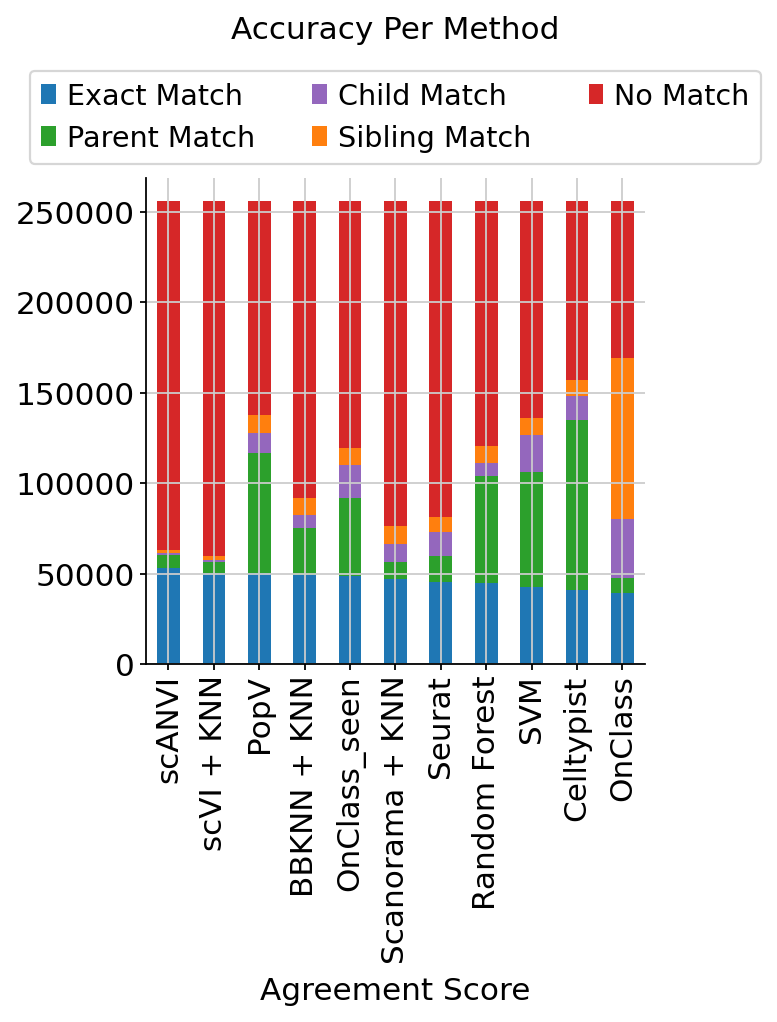

In [51]:
ax = df.plot.bar(stacked=True, color=color_map)

ax.set_xlabel('Agreement Score')
ax.set_title('Accuracy Per Method', y=1.25)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),ncol=3)


In [52]:
ax.get_figure().savefig('fig4/accuracy_per_method.pdf', bbox_inches='tight')

# Accuracy Bar Plots

In [53]:
query.obs['consensus_ontology_accuracy']

4861STDY7462263-GGTGAAGCACGGCTAC    no match
4861STDY7462261-CCTAGCTGTCCAACTA      parent
4861STDY7462261-CCTAGCTGTAGCTGCC    no match
4861STDY7462261-CCTAGCTCATGTAGTC    no match
4861STDY7462261-CCTAGCTCAGCTGTGC       exact
                                      ...   
T07_TH_TOT_1_S1-CAGCTGGAGTTCGCAT    no match
T07_TH_TOT_1_S1-CAGCTGGAGCGATGAC    no match
T07_TH_TOT_1_S1-CAGCTGGAGAGGGCTT       exact
T07_TH_TOT_1_S1-CAGCTAATCTGCAAGT    no match
T07_TH_TOT_1_S1-CAGCTGGTCATAAAGG       exact
Name: consensus_ontology_accuracy, Length: 255901, dtype: category
Categories (5, object): ['child', 'exact', 'no match', 'parent', 'sibling']

In [54]:
neighbor_cells = query.obs['consensus_ontology_accuracy']!='no match'

In [55]:
neighbor_cells

4861STDY7462263-GGTGAAGCACGGCTAC    False
4861STDY7462261-CCTAGCTGTCCAACTA     True
4861STDY7462261-CCTAGCTGTAGCTGCC    False
4861STDY7462261-CCTAGCTCATGTAGTC    False
4861STDY7462261-CCTAGCTCAGCTGTGC     True
                                    ...  
T07_TH_TOT_1_S1-CAGCTGGAGTTCGCAT    False
T07_TH_TOT_1_S1-CAGCTGGAGCGATGAC    False
T07_TH_TOT_1_S1-CAGCTGGAGAGGGCTT     True
T07_TH_TOT_1_S1-CAGCTAATCTGCAAGT    False
T07_TH_TOT_1_S1-CAGCTGGTCATAAAGG     True
Name: consensus_ontology_accuracy, Length: 255901, dtype: bool

In [56]:
query.obs.loc[neighbor_cells, 'consensus_ontology_neighborhood_acc'] = 'is_neighbor'
query.obs.loc[~neighbor_cells, 'consensus_ontology_neighborhood_acc'] = 'not_neighbor'

In [57]:
acc_df = pd.DataFrame()

ct_by_acc = query.obs.groupby(['popv_prediction','consensus_ontology_neighborhood_acc']).size().unstack(level=1)

In [58]:
acc_df['neighbor_accuracy'] = ct_by_acc.divide(ct_by_acc.sum(axis=1), axis=0)['is_neighbor']

In [59]:
ct_by_acc = query.obs.groupby(['popv_prediction','consensus_ontology_accuracy']).size().unstack(level=1)

acc_df['absolute_accuracy'] = ct_by_acc.divide(ct_by_acc.sum(axis=1), axis=0)['exact'].values

In [60]:
acc_df['celltype count'] = query.obs.groupby(['cell_ontology_class']).size()

In [61]:
acc_df

neighbor_accuracy  \
popv_prediction                                                
B cell                                              0.723769   
CD4-positive helper T cell                          0.240889   
CD8-positive, alpha-beta T cell                     0.723554   
CD8-positive, alpha-beta cytotoxic T cell           0.547936   
DN1 thymic pro-T cell                               0.000000   
DN3 thymocyte                                       0.305304   
DN4 thymocyte                                       0.172704   
T follicular helper cell                            0.555224   
dendritic cell                                      0.993641   
double negative thymocyte                           1.000000   
endothelial cell                                    0.977393   
erythrocyte                                         0.924915   
fast muscle cell                                    0.000000   
fibroblast                                          0.986037   
germinal center T cell                              0.000000   
immature natural killer cell                        0.000000   
innate lymphoid cell                                0.000000   
macrophage                                          0.980688   
mast cell                                           0.973684   
mature NK T cell                                    0.866166   
medullary thymic epithelial cell                    0.998256   
monocyte                                            0.747204   
naive regulatory T cell                             0.583333   
plasma cell                                         0.047643   
thymocyte                                           0.712016   
vascular associated smooth muscle cell              0.941945   

                                           absolute_accuracy  celltype count  
popv_prediction                                                               
B cell                                              0.723769          4603.0  
CD4-positive helper T cell                          0.240889         17385.0  
CD8-positive, alpha-beta T cell                     0.686883         14901.0  
CD8-positive, alpha-beta cytotoxic T cell           0.000000             NaN  
DN1 thymic pro-T cell                               0.000000             NaN  
DN3 thymocyte                                       0.000000             NaN  
DN4 thymocyte                                       0.000000             NaN  
T follicular helper cell                            0.000000             NaN  
dendritic cell                                      0.985162          2625.0  
double negative thymocyte                           1.000000         42474.0  
endothelial cell                                    0.977393          5753.0  
erythrocyte                                         0.924915           644.0  
fast muscle cell                                    0.000000             NaN  
fibroblast                                          0.986037         11749.0  
germinal center T cell                              0.000000             NaN  
immature natural killer cell                        0.000000             NaN  
innate lymphoid cell                                0.000000           561.0  
macrophage                                          0.722922           863.0  
mast cell                                           0.973684           148.0  
mature NK T cell                                    0.864916          1964.0  
medullary thymic epithelial cell                    0.423417          7193.0  
monocyte                                            0.586130           265.0  
naive regulatory T cell                             0.583333          7444.0  
plasma cell                                         0.047643           479.0  
thymocyte                                           0.000836           501.0  
vascular associated smooth muscle cell              0.941945          3788.0

In [62]:
query.obs.groupby(['cell_ontology_class']).size()

cell_ontology_class
B cell                                                          4603
CD4-positive helper T cell                                     17385
CD8-alpha-alpha-positive, alpha-beta intraepithelial T cell     6783
CD8-positive, alpha-beta T cell                                14901
T cell                                                          3614
alpha-beta T cell                                              11235
cortical thymic epithelial cell                                 9411
dendritic cell                                                  2625
double negative thymocyte                                      42474
double-positive, alpha-beta thymocyte                          97183
endothelial cell                                                5753
epithelial cell of thymus                                        554
erythrocyte                                                      644
fibroblast                                                     11749
gamma-delta T 

In [63]:
acc_df = acc_df.sort_values('celltype count', ascending=False)

array([<Axes: title={'center': 'absolute_accuracy'}, xlabel='popv_prediction'>,
       <Axes: title={'center': 'neighbor_accuracy'}, xlabel='popv_prediction'>,
       <Axes: title={'center': 'celltype count'}, xlabel='popv_prediction'>],
      dtype=object)

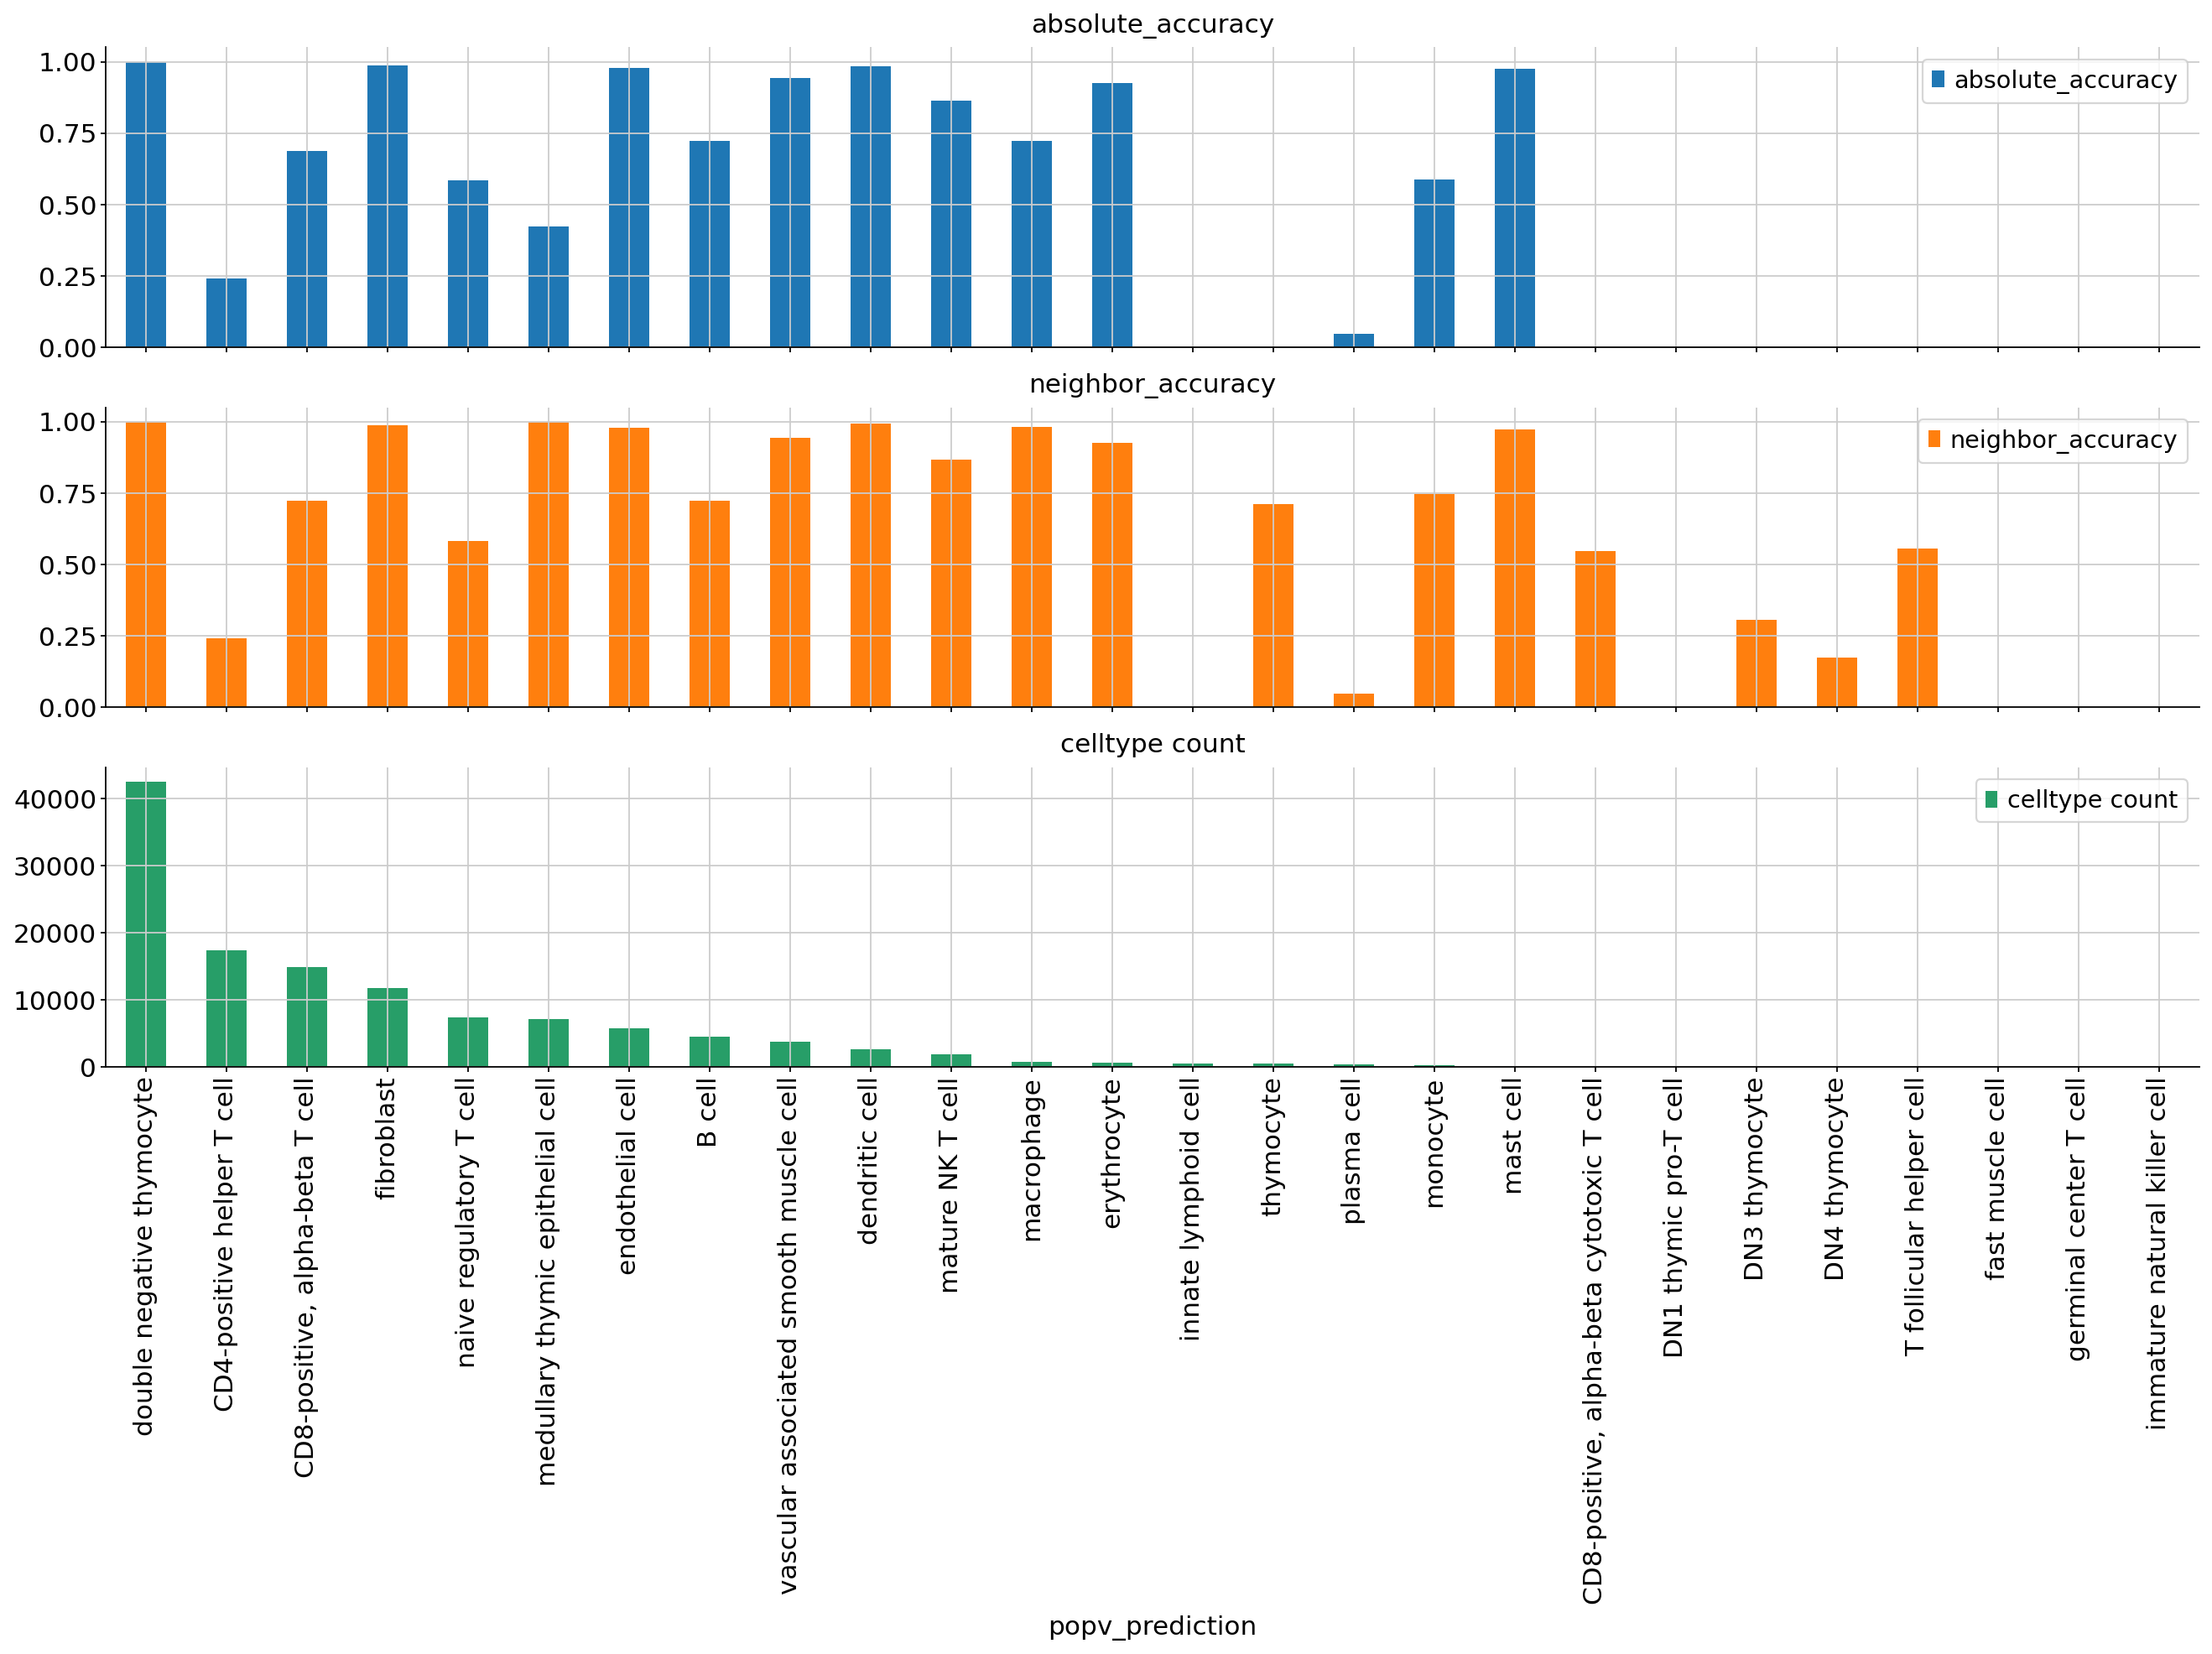

In [64]:
acc_df[['absolute_accuracy', 'neighbor_accuracy', 'celltype count']].plot.bar(figsize=(20,10), subplots=True)


In [65]:
acc_df['neighbor only accuracy'] = acc_df['neighbor_accuracy'] - acc_df['absolute_accuracy']

In [66]:
acc_df

neighbor_accuracy  \
popv_prediction                                                
double negative thymocyte                           1.000000   
CD4-positive helper T cell                          0.240889   
CD8-positive, alpha-beta T cell                     0.723554   
fibroblast                                          0.986037   
naive regulatory T cell                             0.583333   
medullary thymic epithelial cell                    0.998256   
endothelial cell                                    0.977393   
B cell                                              0.723769   
vascular associated smooth muscle cell              0.941945   
dendritic cell                                      0.993641   
mature NK T cell                                    0.866166   
macrophage                                          0.980688   
erythrocyte                                         0.924915   
innate lymphoid cell                                0.000000   
thymocyte                                           0.712016   
plasma cell                                         0.047643   
monocyte                                            0.747204   
mast cell                                           0.973684   
CD8-positive, alpha-beta cytotoxic T cell           0.547936   
DN1 thymic pro-T cell                               0.000000   
DN3 thymocyte                                       0.305304   
DN4 thymocyte                                       0.172704   
T follicular helper cell                            0.555224   
fast muscle cell                                    0.000000   
germinal center T cell                              0.000000   
immature natural killer cell                        0.000000   

                                           absolute_accuracy  celltype count  \
popv_prediction                                                                
double negative thymocyte                           1.000000         42474.0   
CD4-positive helper T cell                          0.240889         17385.0   
CD8-positive, alpha-beta T cell                     0.686883         14901.0   
fibroblast                                          0.986037         11749.0   
naive regulatory T cell                             0.583333          7444.0   
medullary thymic epithelial cell                    0.423417          7193.0   
endothelial cell                                    0.977393          5753.0   
B cell                                              0.723769          4603.0   
vascular associated smooth muscle cell              0.941945          3788.0   
dendritic cell                                      0.985162          2625.0   
mature NK T cell                                    0.864916          1964.0   
macrophage                                          0.722922           863.0   
erythrocyte                                         0.924915           644.0   
innate lymphoid cell                                0.000000           561.0   
thymocyte                                           0.000836           501.0   
plasma cell                                         0.047643           479.0   
monocyte                                            0.586130           265.0   
mast cell                                           0.973684           148.0   
CD8-positive, alpha-beta cytotoxic T cell           0.000000             NaN   
DN1 thymic pro-T cell                               0.000000             NaN   
DN3 thymocyte                                       0.000000             NaN   
DN4 thymocyte                                       0.000000             NaN   
T follicular helper cell                            0.000000             NaN   
fast muscle cell                                    0.000000             NaN   
germinal center T cell                              0.000000             NaN   
immature natural killer cell                        0.000000             NaN   

         

In [67]:
acc_df['Absolute Accuracy'] = acc_df['absolute_accuracy']
acc_df['Neighbor Only Accuracy'] = acc_df['neighbor only accuracy']

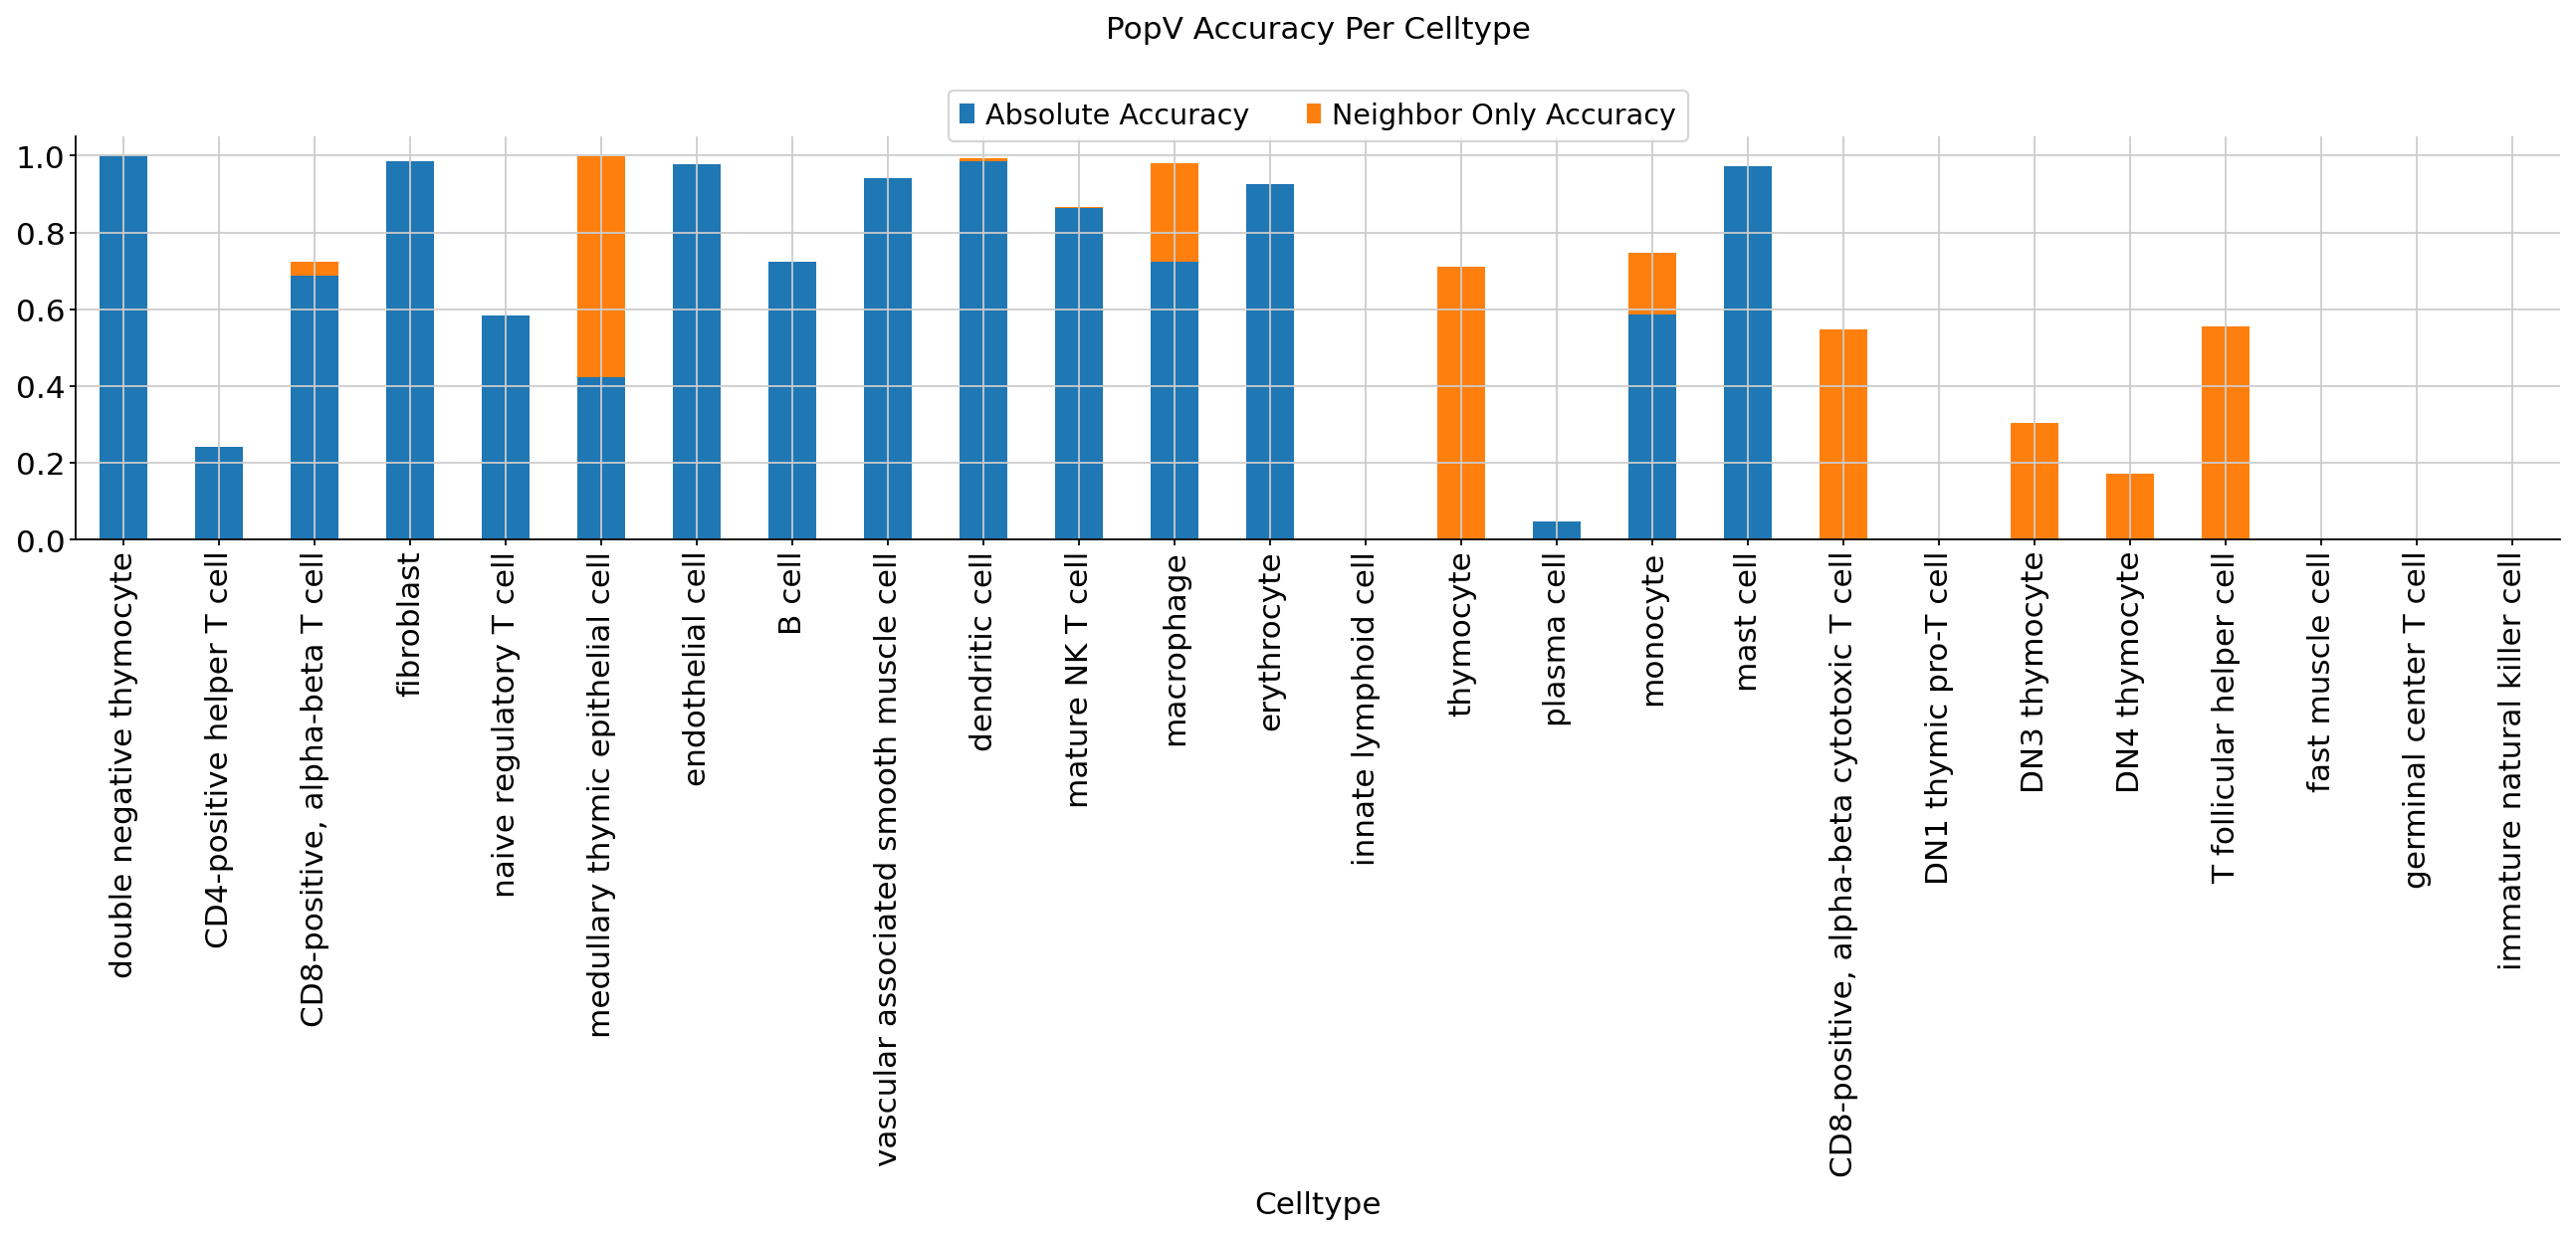

In [68]:
ax = acc_df[['Absolute Accuracy','Neighbor Only Accuracy']].plot.bar(figsize=(20,10/3), stacked=True)
ax.set_xlabel('Celltype')
ax.set_title('PopV Accuracy Per Celltype', y=1.2)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),ncol=2)


In [69]:
fig = ax.get_figure()
fig.savefig('fig4/fig4_popv_acc_per_celltype.pdf', bbox_inches='tight')

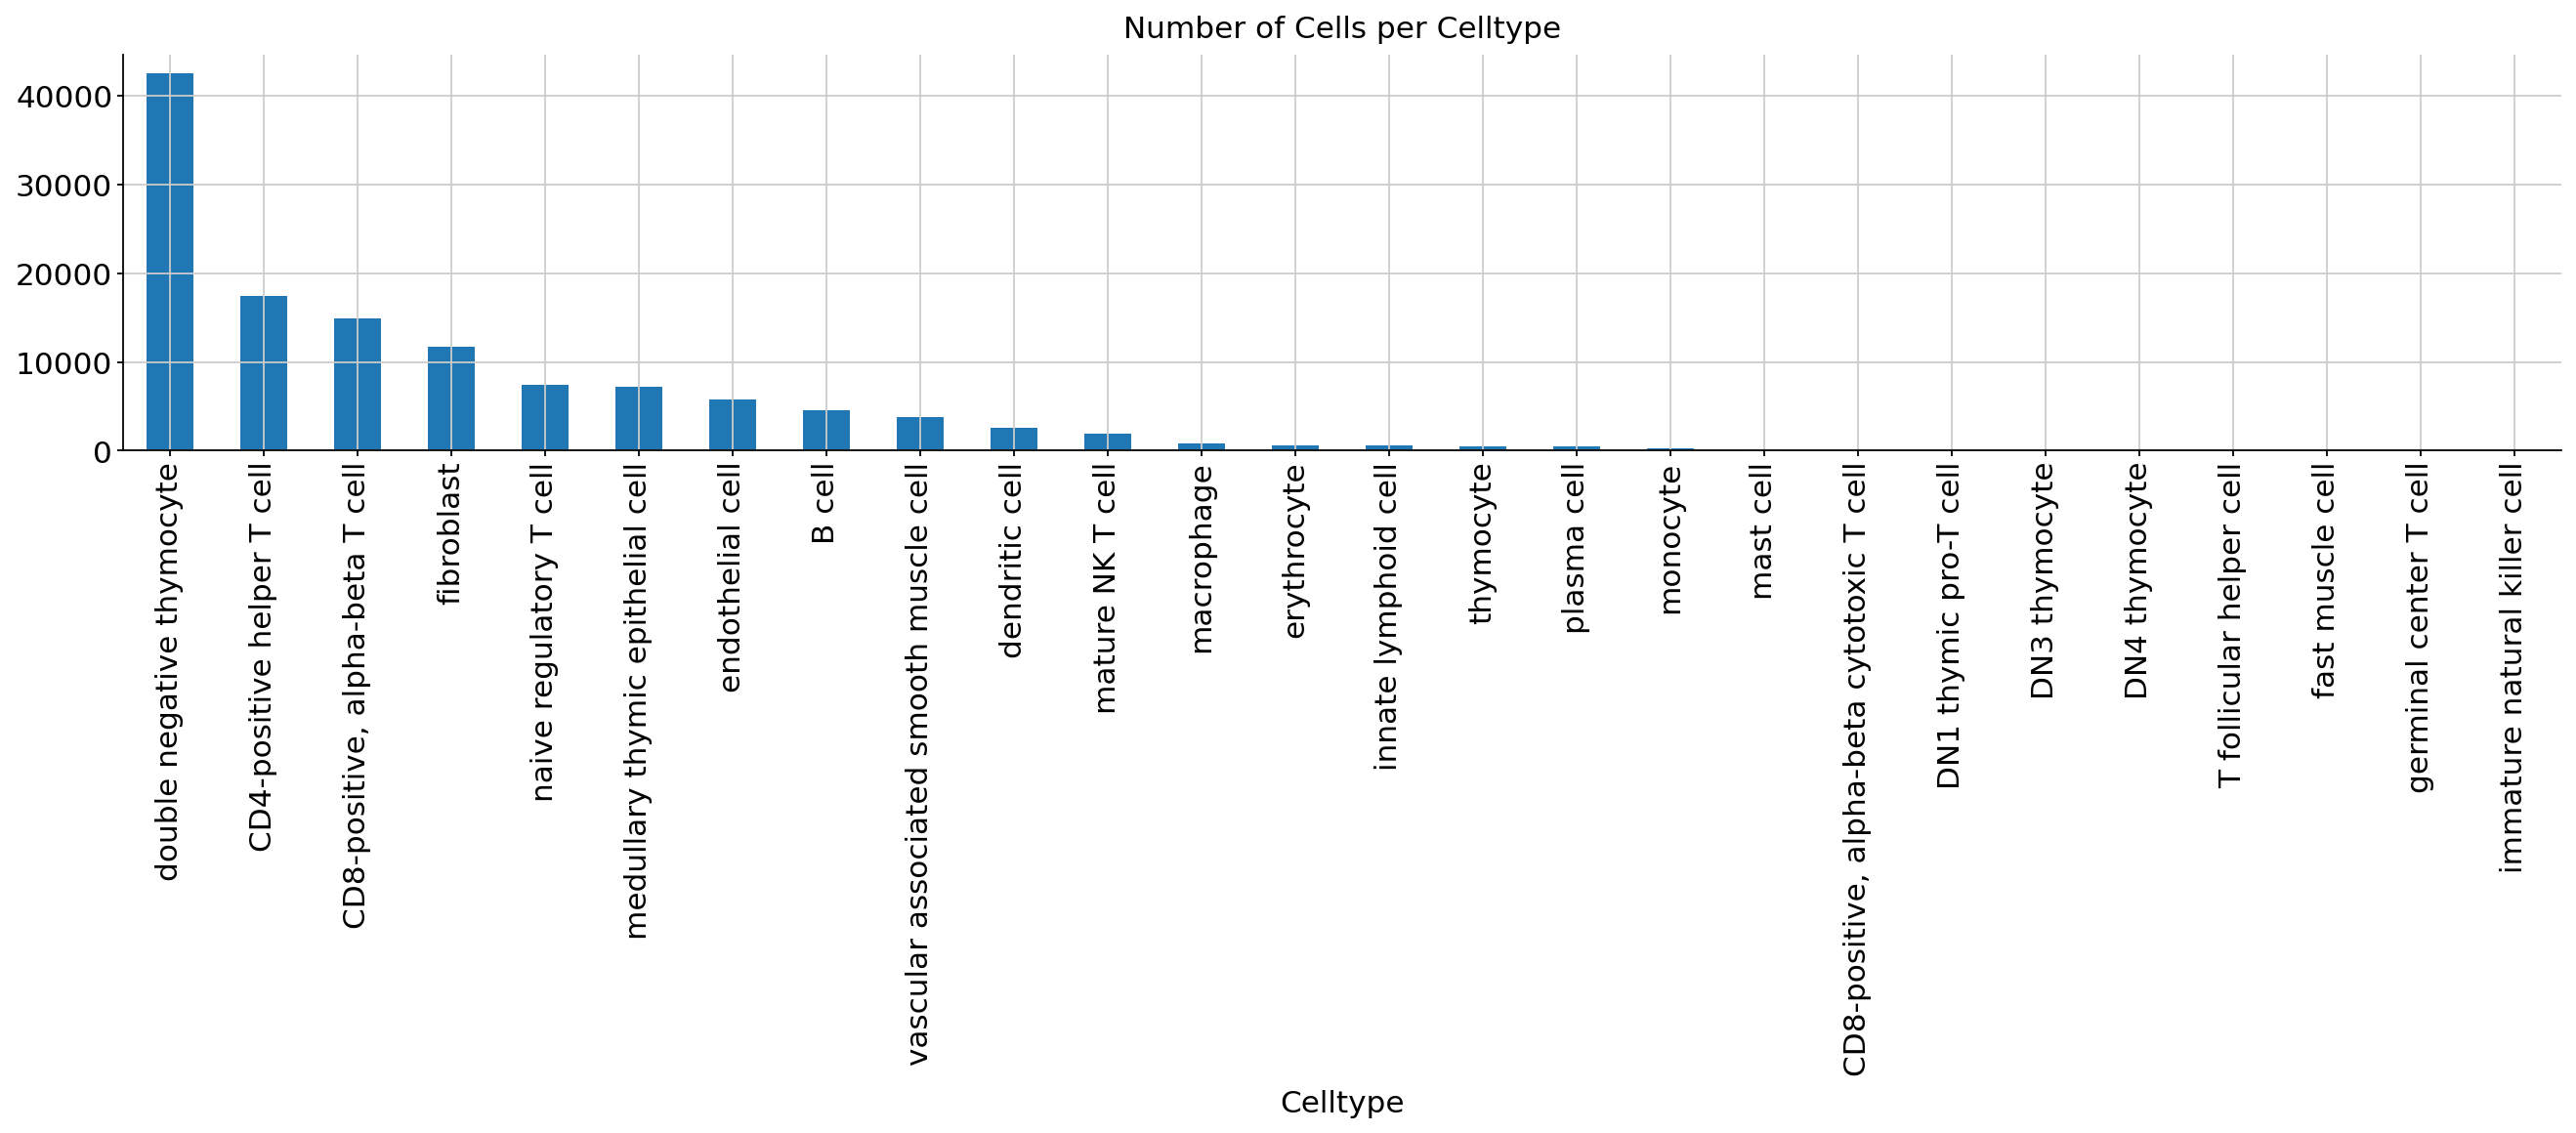

In [70]:
ax = acc_df[['celltype count']].plot.bar(figsize=(20,10/3))
ax.set_xlabel('Celltype')
ax.set_title('Number of Cells per Celltype')
ax.get_legend().remove()

In [71]:
ax.get_figure().savefig('fig4/fig4_celltype_count.pdf', bbox_inches='tight')

In [72]:
query

AnnData object with n_obs × n_vars = 255901 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', 'cell_ontology_class_original', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'Sample', 'paper_annotation', 'development_stage', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilities', 'p

In [73]:
agreement_per_ct = query.obs.groupby(['popv_prediction','popv_prediction_score']).size().unstack(level=1)

In [74]:
n_cells = agreement_per_ct.sum(axis=1).values

In [75]:
acc_df = pd.DataFrame(columns =['Exact Match', 'Parent Match', 'Sibling Match', 'Child Match'])

In [76]:
query

AnnData object with n_obs × n_vars = 255901 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', 'cell_ontology_class_original', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'Sample', 'paper_annotation', 'development_stage', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilities', 'p

In [77]:
pred_keys_acc = [i + '_ontology_accuracy_annotated' for i in list(query.uns['prediction_keys']) + ['consensus', 'popv_onclass_seen']]
n_obs = query.n_obs

In [78]:
pred_keys_acc

['popv_celltypist_prediction_ontology_accuracy_annotated',
 'popv_knn_on_bbknn_prediction_ontology_accuracy_annotated',
 'popv_knn_on_scanorama_prediction_ontology_accuracy_annotated',
 'popv_knn_on_scvi_prediction_ontology_accuracy_annotated',
 'popv_onclass_prediction_ontology_accuracy_annotated',
 'popv_rf_prediction_ontology_accuracy_annotated',
 'popv_scanvi_prediction_ontology_accuracy_annotated',
 'popv_svm_prediction_ontology_accuracy_annotated',
 'consensus_ontology_accuracy_annotated',
 'popv_onclass_seen_ontology_accuracy_annotated']

In [79]:
for k in pred_keys_acc:
    absolute_acc = query[query.obs[k]=='Exact Match'].n_obs/n_obs
    parent_acc = query[query.obs[k] == 'Parent Match'].n_obs/n_obs
    sibling_acc = query[query.obs[k] == 'Sibling Match'].n_obs/n_obs
    child_acc = query[query.obs[k] == 'Child Match',].n_obs/n_obs
    
    acc_df.loc[k] = [absolute_acc, parent_acc, sibling_acc, child_acc]

In [80]:
acc_df.index = [s.replace('_ontology_accuracy', '') for s in acc_df.index]

In [81]:
acc_df.index

Index(['popv_celltypist_prediction_annotated',
       'popv_knn_on_bbknn_prediction_annotated',
       'popv_knn_on_scanorama_prediction_annotated',
       'popv_knn_on_scvi_prediction_annotated',
       'popv_onclass_prediction_annotated', 'popv_rf_prediction_annotated',
       'popv_scanvi_prediction_annotated', 'popv_svm_prediction_annotated',
       'consensus_annotated', 'popv_onclass_seen_annotated'],
      dtype='object')

In [82]:
acc_df.index = [s.replace('consensus', 'PopV') for s in acc_df.index]
acc_df.index = [s.replace('popv_knn_on_scanorama_prediction', 'Scanorama + KNN') for s in acc_df.index]
acc_df.index = [s.replace('popv_knn_on_scvi_prediction', 'scVI + KNN') for s in acc_df.index]
acc_df.index = [s.replace('popv_scanvi_prediction', 'scANVI') for s in acc_df.index]
acc_df.index = [s.replace('popv_knn_on_bbknn_prediction', 'BBKNN + KNN') for s in acc_df.index]
acc_df.index = [s.replace('popv_rf_prediction', 'Random Forest') for s in acc_df.index]
acc_df.index = [s.replace('seurat_prediction', 'Seurat') for s in acc_df.index]
acc_df.index = [s.replace('popv_onclass_prediction', 'OnClass') for s in acc_df.index]
acc_df.index = [s.replace('popv_onclass_seen', 'OnClass_seen') for s in acc_df.index]
acc_df.index = [s.replace('popv_celltypist_prediction', 'Celltypist') for s in acc_df.index]
acc_df.index = [s.replace('popv_svm_prediction', 'SVM') for s in acc_df.index]

In [83]:
acc_df = acc_df.sort_values("Exact Match", ascending=False)

In [84]:
%%capture
ax = acc_df.plot.bar(stacked=True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.16),ncol=4)
ax.set_title('Accuracy Per Method', y=1.16)
ax.set_xlabel('Method')
fig = ax.get_figure()

In [85]:
acc_df

Exact Match  Parent Match  Sibling Match  \
scANVI_annotated              0.207018      0.030129       0.006682   
scVI + KNN_annotated          0.197623      0.022677       0.008550   
PopV_annotated                0.196982      0.259264       0.037557   
BBKNN + KNN_annotated         0.193012      0.102118       0.035869   
OnClass_seen_annotated        0.190167      0.168858       0.036221   
Scanorama + KNN_annotated     0.183309      0.037894       0.037530   
Random Forest_annotated       0.175001      0.231476       0.036440   
SVM_annotated                 0.167186      0.247522       0.035940   
Celltypist_annotated          0.160035      0.368322       0.036166   
OnClass_annotated             0.154423      0.031719       0.347642   

                           Child Match  
scANVI_annotated              0.002282  
scVI + KNN_annotated          0.004951  
PopV_annotated                0.043966  
BBKNN + KNN_annotated         0.028089  
OnClass_seen_annotated        0.070758  
Scanorama + KNN_annotated     0.039519  
Random Forest_annotated       0.027647  
SVM_annotated                 0.081008  
Celltypist_annotated          0.050180  
OnClass_annotated             0.128405

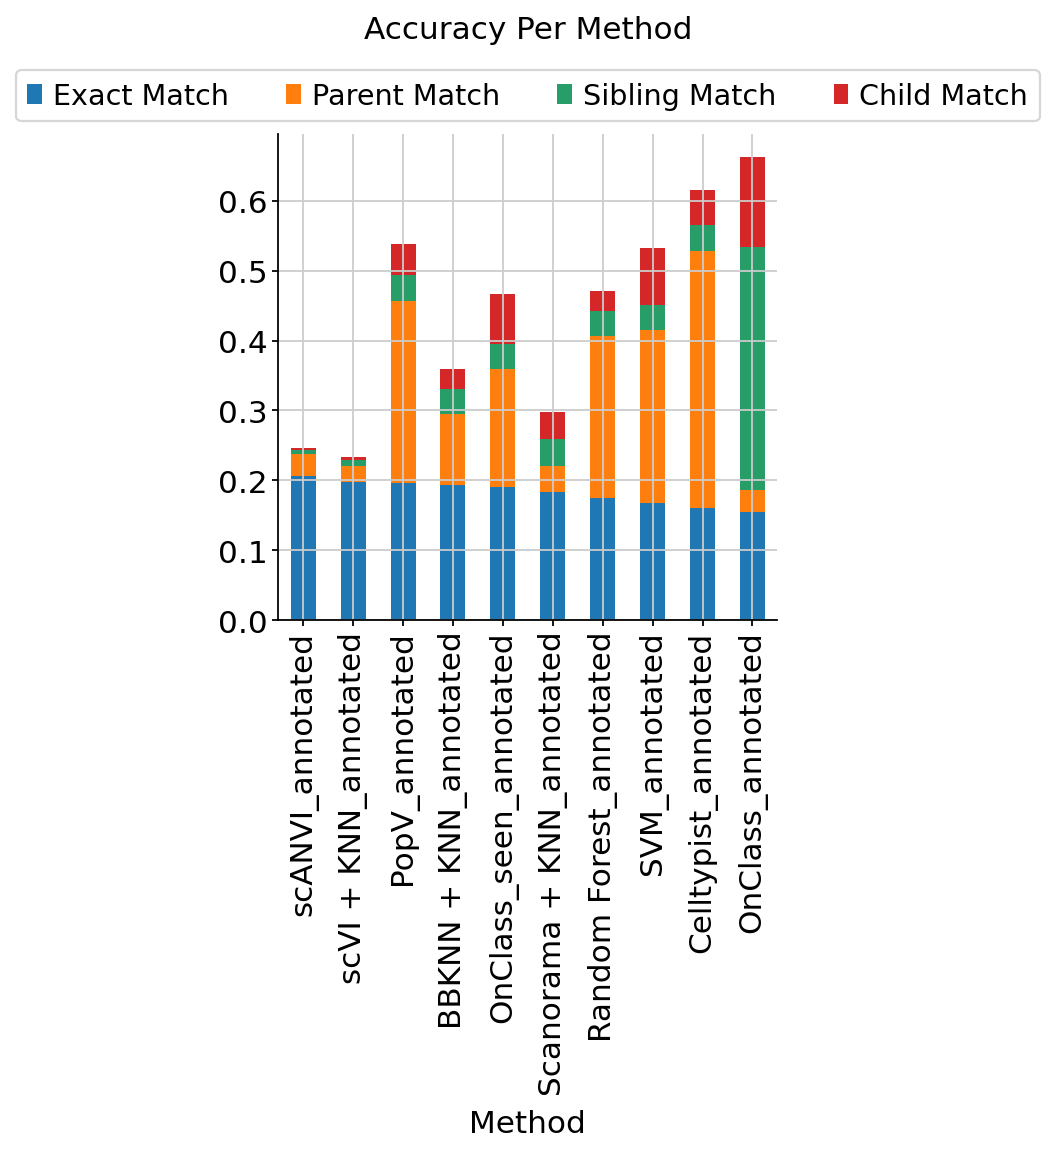

In [86]:
fig

In [87]:
%%capture
ax = acc_df.plot.bar(stacked=True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.09),ncol=4)
ax.set_title('Accuracy Per Method', y=1.09)
ax.set_xlabel('Method')
fig = ax.get_figure()

In [88]:
fig.savefig('fig4/fig4_acc_per_method.pdf', bbox_inches='tight')

# Adult

In [89]:
list(query.obs['development_stage'].unique())

['young adult stage',
 'human early adulthood stage',
 '9th week post-fertilization human stage',
 'organogenesis stage',
 '16th week post-fertilization human stage',
 '11th week post-fertilization human stage',
 '17th week post-fertilization human stage',
 '14th week post-fertilization human stage',
 '13th week post-fertilization human stage',
 '12th week post-fertilization human stage',
 '10th week post-fertilization human stage',
 'infant stage',
 'adolescent stage',
 '10-month-old human stage',
 '2-year-old human stage',
 '3-month-old human stage']

In [90]:
adult = query[query.obs['development_stage']=='human early adulthood stage']

In [91]:
df = adult.obs[acc_annotated_cols].apply(pd.Series.value_counts)


In [92]:
df = df.T

In [93]:
df = df.sort_values('Exact Match', ascending=False)

In [94]:
df.index = ['_'.join([i for i in s.split('_')[:-3] if i!='prediction']) for s in df.index]
rename_dict = {
    'consensus': 'PopV',
    'popv_celltypist': 'Celltypist',
    'popv_knn_on_scanorama': 'Scanorama + KNN',
    'popv_knn_on_scvi': 'scVI + KNN',
    'popv_scanvi': 'scANVI',
    'popv_knn_on_bbknn': 'BBKNN + KNN',
    'popv_rf': 'Random Forest',
    'seurat': 'Seurat',
    'popv_onclass': 'OnClass',
    'popv_onclass_seen': 'OnClass_seen',
    'popv_svm': 'SVM'}
df = df.rename(index=rename_dict)

In [100]:
df = df.div(df.sum(axis=1), axis=0)

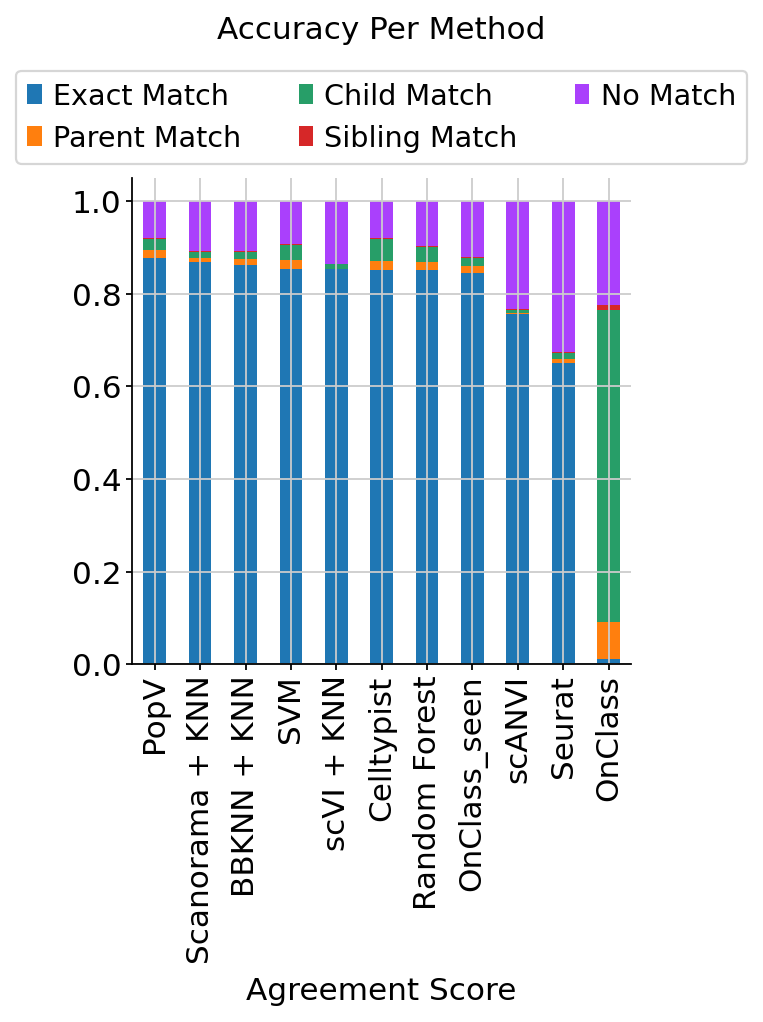

In [103]:
ax = df.plot.bar(stacked=True)

ax.set_xlabel('Agreement Score')
ax.set_title('Accuracy Per Method', y=1.25)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),ncol=3)
plt.savefig('fig4/fig4_prediction_accuracy_adult_new.pdf', bbox_inches='tight')

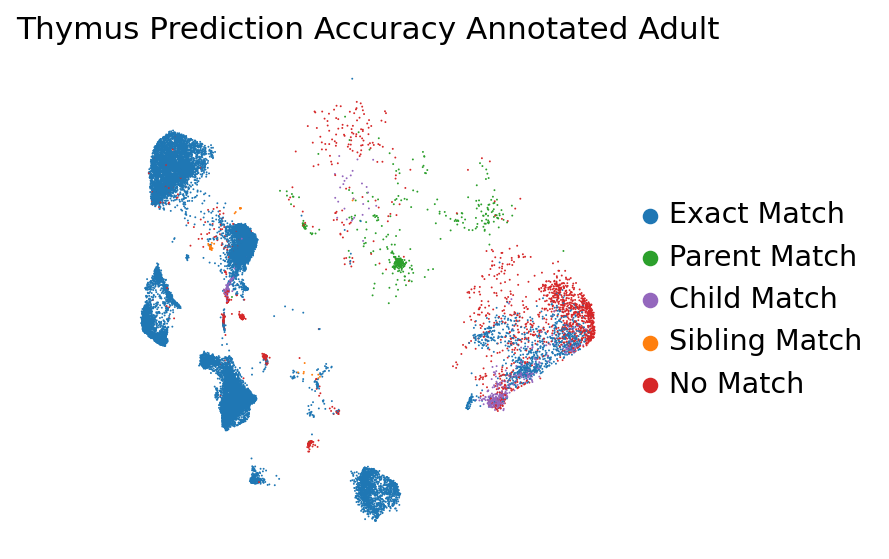

In [181]:
# TODO add an N here

fig = sc.pl.umap(adult,
                 color='consensus_ontology_accuracy_annotated',
                 title='Thymus Prediction Accuracy Annotated Adult',
                 frameon=False,
                 size=3,
                 palette=color_map,
                 return_fig=True)


fig.savefig('fig4/fig4_umap_prediction_accuracy_annotated_adult.pdf', bbox_inches='tight')


# Fetal

In [182]:
list(query.obs['development_stage'].unique())

['young adult stage',
 'human early adulthood stage',
 '9th week post-fertilization human stage',
 'organogenesis stage',
 '16th week post-fertilization human stage',
 '11th week post-fertilization human stage',
 '17th week post-fertilization human stage',
 '14th week post-fertilization human stage',
 '13th week post-fertilization human stage',
 '12th week post-fertilization human stage',
 '10th week post-fertilization human stage',
 'infant stage',
 'adolescent stage',
 '10-month-old human stage',
 '2-year-old human stage',
 '3-month-old human stage']

In [52]:
fetal = query[['th week' in i for i in query.obs['development_stage']]]

In [53]:
fetal.obs['development_stage'].unique()

['9th week post-fertilization human stage', '16th week post-fertilization human stage', '11th week post-fertilization human stage', '17th week post-fertilization human stage', '14th week post-fertilization human stage', '13th week post-fertilization human stage', '12th week post-fertilization human stage', '10th week post-fertilization human stage']
Categories (8, object): ['9th week post-fertilization human stage', '10th week post-fertilization human stage', '11th week post-fertilization human stage', '12th week post-fertilization human stage', '13th week post-fertilization human stage', '14th week post-fertilization human stage', '16th week post-fertilization human stage', '17th week post-fertilization human stage']

In [185]:
df = fetal.obs[acc_annotated_cols].apply(pd.Series.value_counts)


In [186]:
df = df.T

In [187]:
df = df.sort_values('Exact Match', ascending=False)

In [188]:
df.index = ['_'.join([i for i in s.split('_')[:-3] if i!='prediction']) for s in df.index]
rename_dict = {
    'consensus': 'PopV',
    'popv_celltypist': 'Celltypist',
    'popv_knn_on_scanorama': 'Scanorama + KNN',
    'popv_knn_on_scvi': 'scVI + KNN',
    'popv_scanvi': 'scANVI',
    'popv_knn_on_bbknn': 'BBKNN + KNN',
    'popv_rf': 'Random Forest',
    'seurat': 'Seurat',
    'popv_onclass': 'OnClass',
    'popv_onclass_seen': 'OnClass_seen',
    'popv_svm': 'SVM'}
df = df.rename(index=rename_dict)

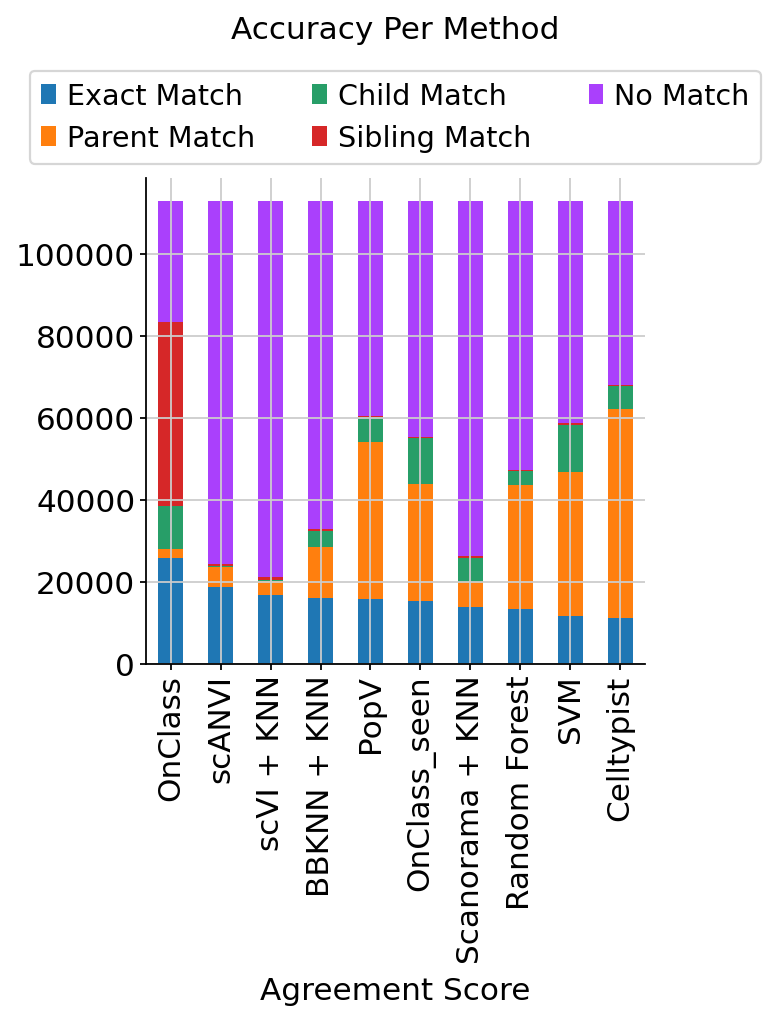

In [189]:
ax = df.plot.bar(stacked=True)

ax.set_xlabel('Agreement Score')
ax.set_title('Accuracy Per Method', y=1.25)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),ncol=3)
fig.savefig('fig4/fig4_prediction_accuracy_fetal.pdf', bbox_inches='tight')

In [55]:
# making the palette 

from scanpy.plotting import palettes

# making celltypes to colors
query_ct = np.unique(fetal.obs['popv_onclass_prediction']).tolist()
onclass_ct = np.unique(fetal.obs['popv_prediction']).tolist()
query_gt_ct = np.unique(fetal.obs['cell_ontology_class']).tolist()

all_ct = list(set(onclass_ct + query_ct + query_gt_ct))
all_ct.sort()
cmap = palettes.default_102

palette = {}
for i, ct in enumerate(all_ct):
    palette[ct] = cmap[i+1] # added the +1 here because i didnt like how it looked starting with number 1


In [56]:
%%capture 
fig = sc.pl.umap(fetal,
                 color="cell_ontology_class",
                 frameon=False,
                 title='TS Reference Annotation', 
                 return_fig = True, 
                 size = 3,
                 palette=palette)


In [57]:
#make legend
from matplotlib.lines import Line2D

legend_elements = []
for ct, color in palette.items():
    legend_elements.append(Line2D([], [], color=color, lw =6, label=ct))
    
fig.get_axes()[0].legend(handles=legend_elements,  loc='upper left', bbox_to_anchor=(1, 1), ncol=5)

In [58]:
fig.show()
fig.savefig('fig4/fig4_umap_prediction_fetal_legend.pdf', bbox_inches='tight')

In [62]:
fetal

AnnData object with n_obs × n_vars = 112967 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', 'cell_ontology_class_original', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'Sample', 'paper_annotation', 'development_stage', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilities', 'p

In [63]:
fetal.obsm['X_umap'] = fetal.obsm['X_scanvi_umap_popv']

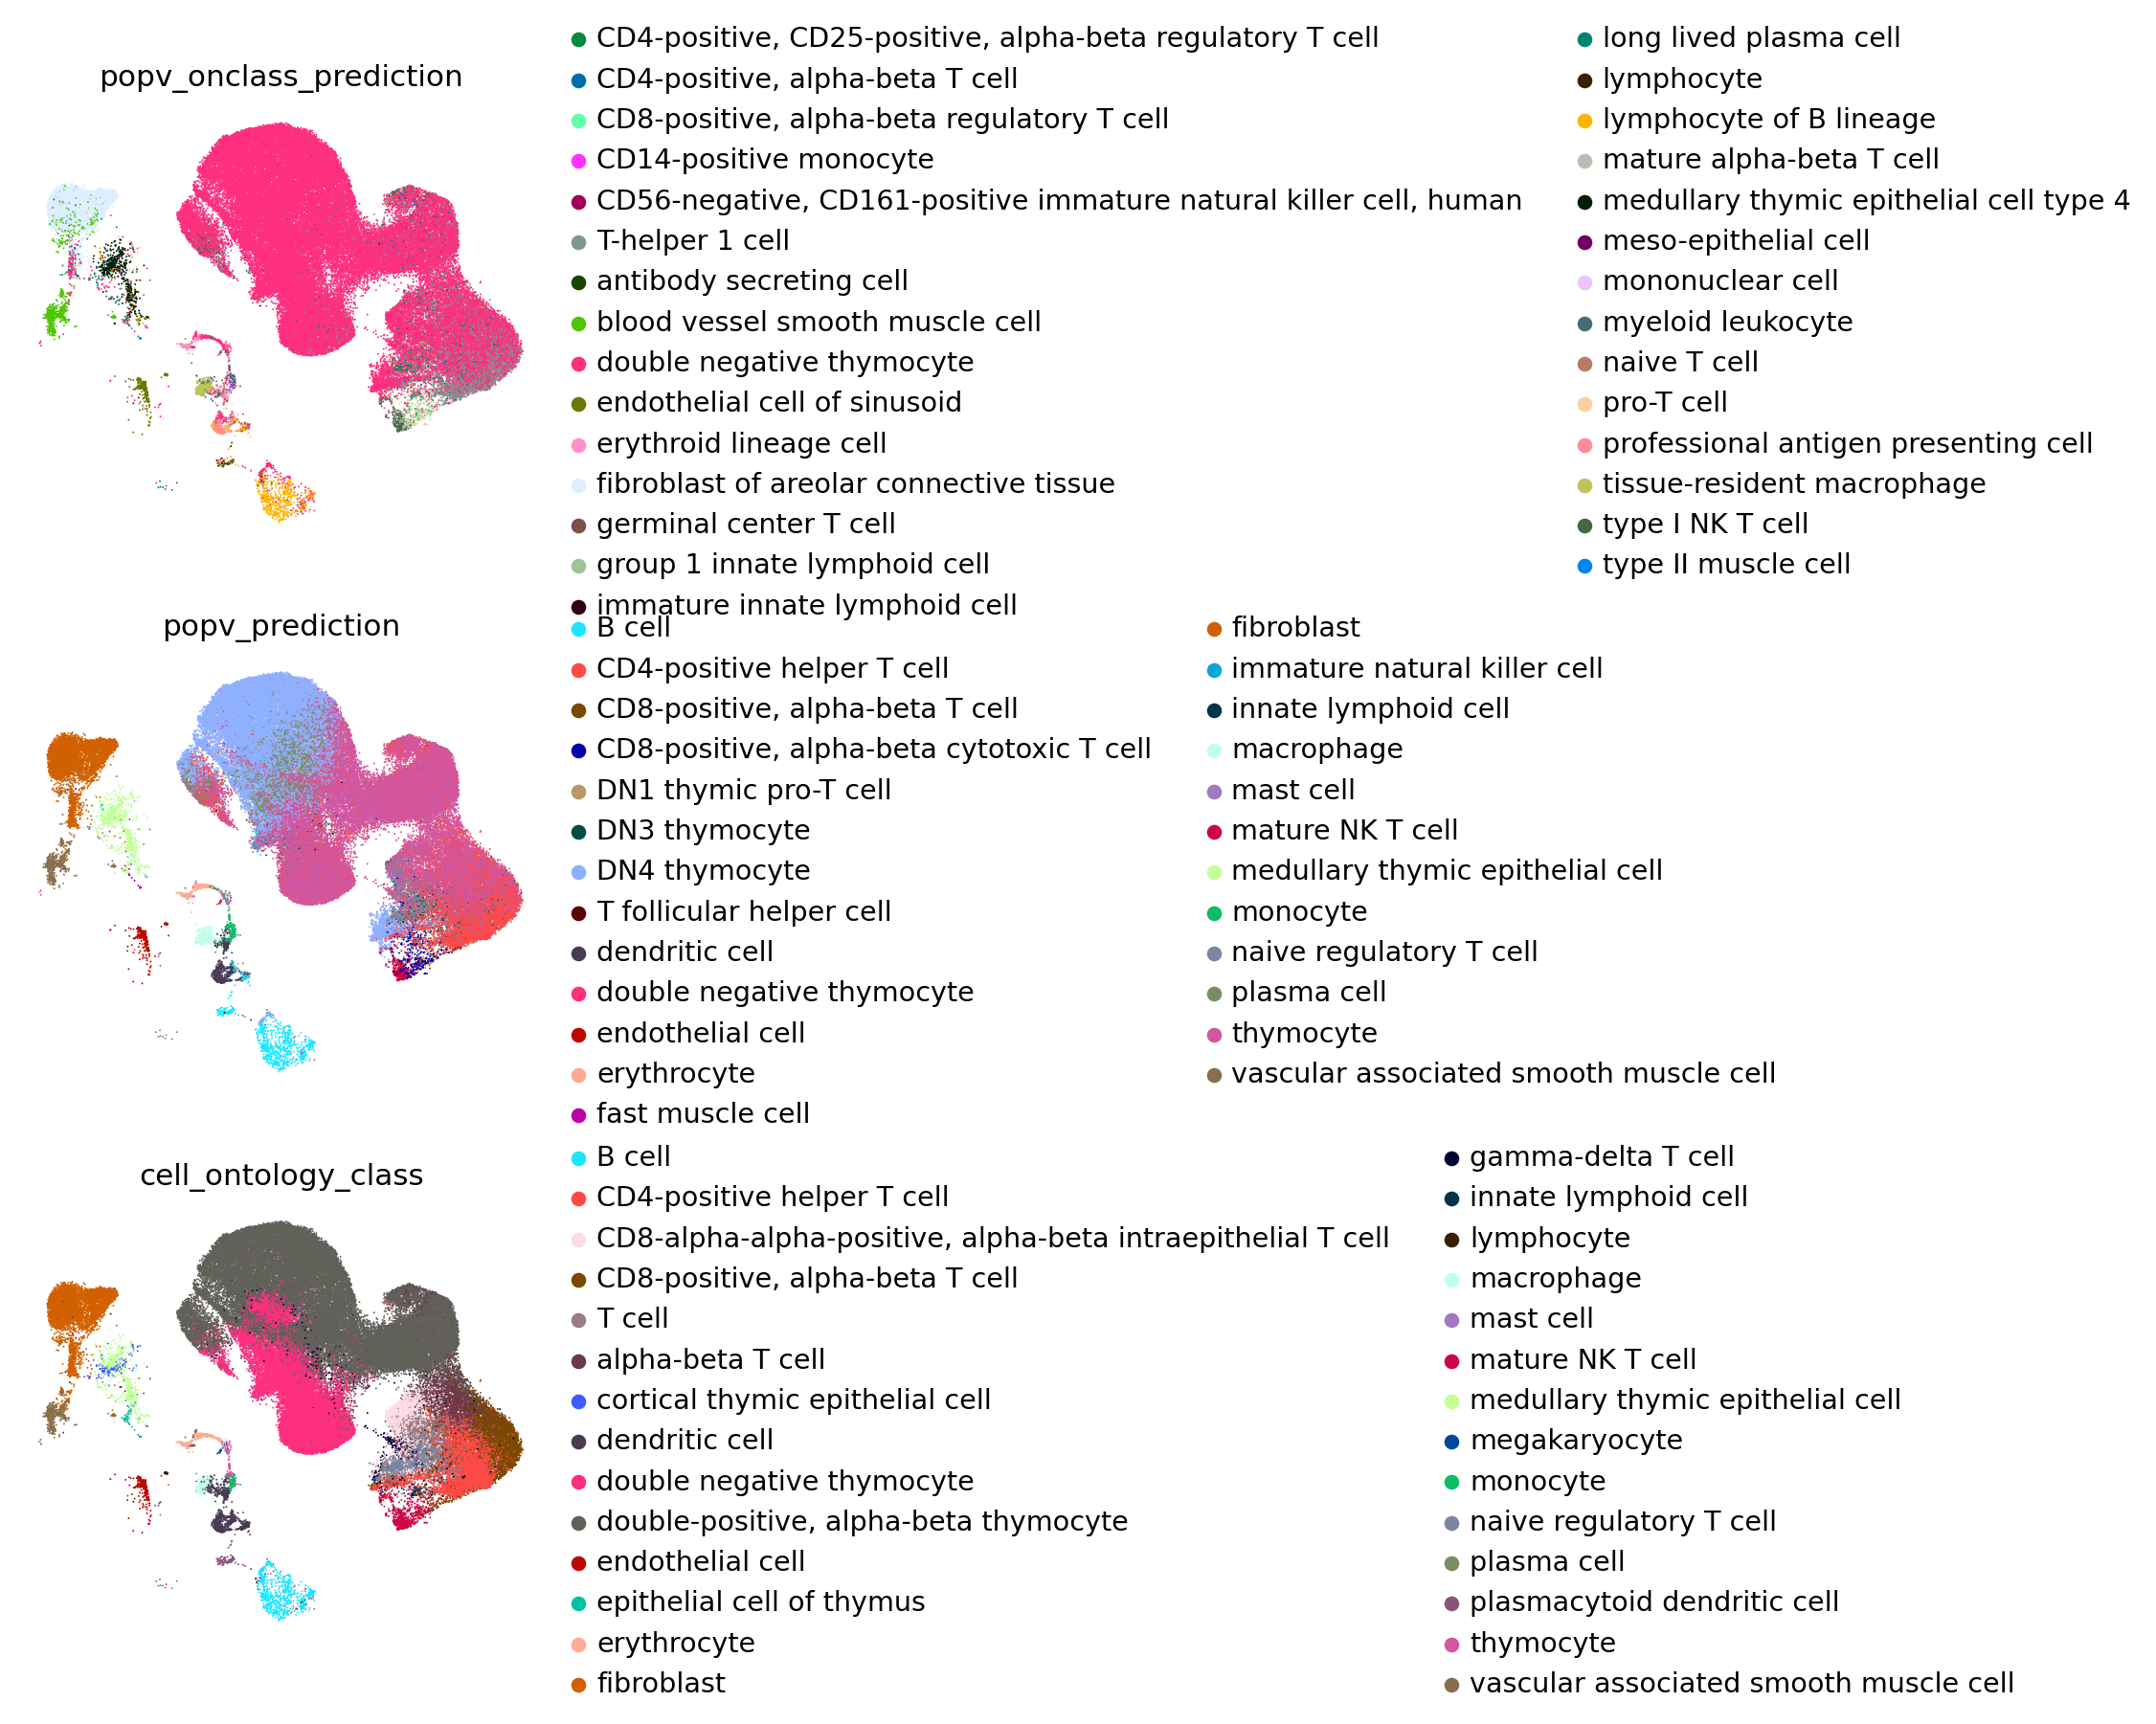

In [64]:
# TODO add an N here

fig = sc.pl.umap(fetal,
                 color=[
                     'popv_onclass_prediction',
                     'popv_prediction',
                     'cell_ontology_class'
                 ],
                 frameon=False,
                 size=3,
                 return_fig=True,
                 ncols=1,
                 palette=palette)


fig.savefig('fig4/fig4_umap_prediction_fetal.pdf', bbox_inches='tight')

In [197]:
fetal

AnnData object with n_obs × n_vars = 112967 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', 'cell_ontology_class_original', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'Sample', 'paper_annotation', 'development_stage', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilities', 'p

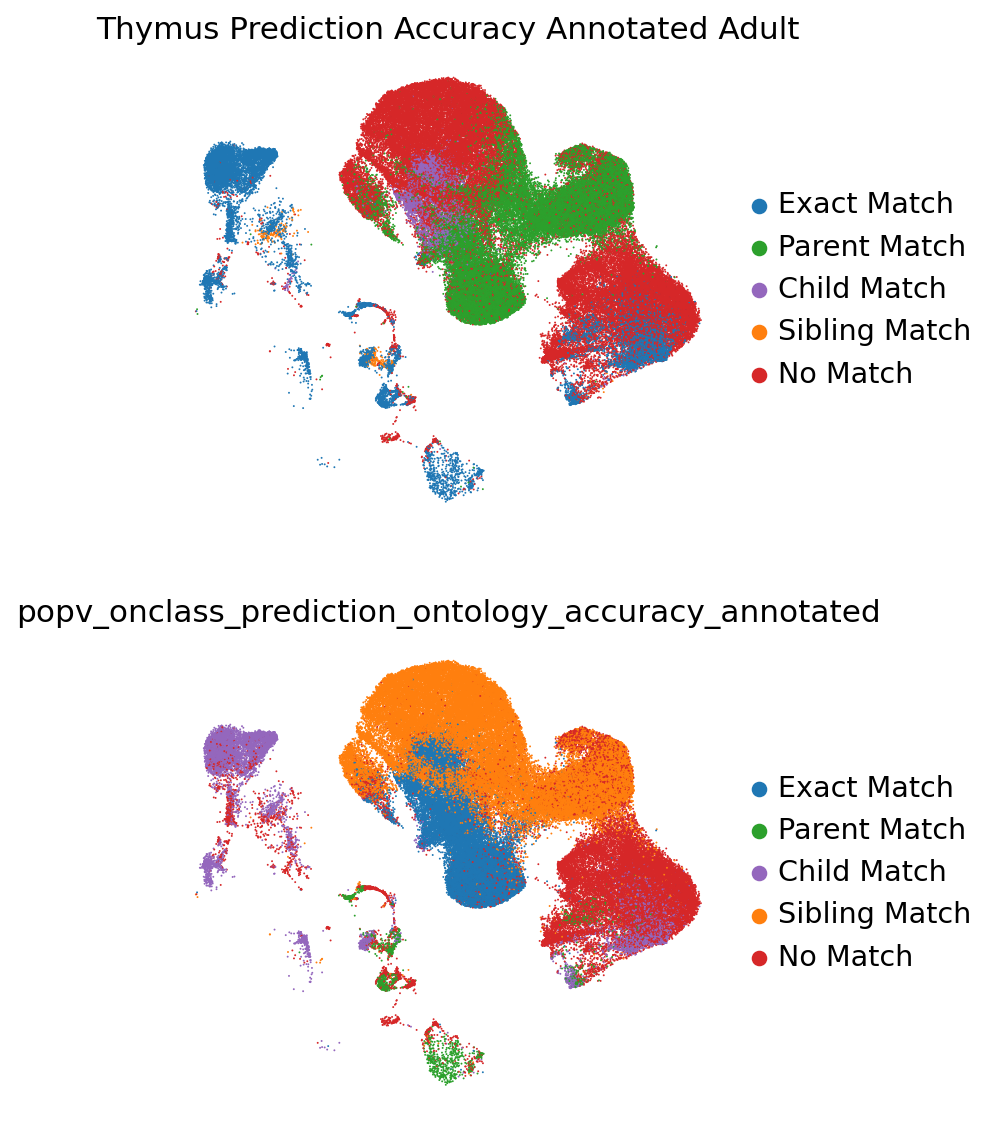

In [200]:
# TODO add an N here

fig = sc.pl.umap(fetal,
                 color=[
                     'consensus_ontology_accuracy_annotated',
                     'popv_onclass_prediction_ontology_accuracy_annotated'
                 ],
                 title='Thymus Prediction Accuracy Annotated Adult',
                 frameon=False,
                 size=3,
                 palette=color_map,
                 return_fig=True,
                 ncols=1)


fig.savefig('fig4/fig4_umap_prediction_accuracy_annotated_fetal.pdf', bbox_inches='tight')
